# Spaceship Titanic: Exploratory Data Analysis
## Imports

In [1]:
import warnings
from itertools import product
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import polars.selectors as cs
import seaborn as sns
import seaborn.objects as so
from matplotlib.ticker import AutoMinorLocator, PercentFormatter
from sklearn.preprocessing import KBinsDiscretizer, PowerTransformer
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
pl.Config.set_tbl_cols(14)
warnings.simplefilter(action="ignore", category=FutureWarning)

## Read data

In [3]:
data_dir = Path.cwd().parent / "input" / "spaceship-titanic"
assert data_dir.exists(), f"directory doesn't exist: {data_dir}"

In [4]:
# Training data
df_train = pl.read_csv(data_dir / "train.csv")
df_train.head(10)

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
str,str,bool,str,str,f64,bool,f64,f64,f64,f64,f64,str,bool
"""0001_01""","""Europa""",false,"""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,0.0,0.0,0.0,"""Maham Ofraccul…",false
"""0002_01""","""Earth""",false,"""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,25.0,549.0,44.0,"""Juanna Vines""",true
"""0003_01""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,0.0,6715.0,49.0,"""Altark Susent""",false
"""0003_02""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,371.0,3329.0,193.0,"""Solam Susent""",false
"""0004_01""","""Earth""",false,"""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,151.0,565.0,2.0,"""Willy Santanti…",true
"""0005_01""","""Earth""",false,"""F/0/P""","""PSO J318.5-22""",44.0,false,0.0,483.0,0.0,291.0,0.0,"""Sandie Hinetth…",true
"""0006_01""","""Earth""",false,"""F/2/S""","""TRAPPIST-1e""",26.0,false,42.0,1539.0,3.0,0.0,0.0,"""Billex Jacosta…",true
"""0006_02""","""Earth""",true,"""G/0/S""","""TRAPPIST-1e""",28.0,false,0.0,0.0,0.0,0.0,null,"""Candra Jacosta…",true
"""0007_01""","""Earth""",false,"""F/3/S""","""TRAPPIST-1e""",35.0,false,0.0,785.0,17.0,216.0,0.0,"""Andona Beston""",true


In [5]:
# Test data
df_test = pl.read_csv(data_dir / "test.csv")
df_test.head(10)

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
str,str,bool,str,str,f64,bool,f64,f64,f64,f64,f64,str
"""0013_01""","""Earth""",true,"""G/3/S""","""TRAPPIST-1e""",27.0,false,0.0,0.0,0.0,0.0,0.0,"""Nelly Carsonin…"
"""0018_01""","""Earth""",false,"""F/4/S""","""TRAPPIST-1e""",19.0,false,0.0,9.0,0.0,2823.0,0.0,"""Lerome Peckers…"
"""0019_01""","""Europa""",true,"""C/0/S""","""55 Cancri e""",31.0,false,0.0,0.0,0.0,0.0,0.0,"""Sabih Unhearfu…"
"""0021_01""","""Europa""",false,"""C/1/S""","""TRAPPIST-1e""",38.0,false,0.0,6652.0,0.0,181.0,585.0,"""Meratz Caltilt…"
"""0023_01""","""Earth""",false,"""F/5/S""","""TRAPPIST-1e""",20.0,false,10.0,0.0,635.0,0.0,0.0,"""Brence Harpere…"
"""0027_01""","""Earth""",false,"""F/7/P""","""TRAPPIST-1e""",31.0,false,0.0,1615.0,263.0,113.0,60.0,"""Karlen Ricks"""
"""0029_01""","""Europa""",true,"""B/2/P""","""55 Cancri e""",21.0,false,0.0,null,0.0,0.0,0.0,"""Aldah Ainserfl…"
"""0032_01""","""Europa""",true,"""D/0/S""","""TRAPPIST-1e""",20.0,false,0.0,0.0,0.0,0.0,0.0,"""Acrabi Pringry…"
"""0032_02""","""Europa""",true,"""D/0/S""","""55 Cancri e""",23.0,false,0.0,0.0,0.0,0.0,0.0,"""Dhena Pringry"""


## Number of observations

In [6]:
# Training data
df_train.height

8693

In [7]:
# Test data
df_test.height

4277

## Missing values

In [8]:
# Training data
df_train.null_count()

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,201,217,199,182,179,203,181,183,208,183,188,200,0


In [9]:
# Test data
df_test.null_count()

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,87,93,100,92,91,93,82,106,98,101,80,94


## `PassengerId`

In [10]:
# Extract groups
groups = df_train.get_column("PassengerId").str.split("_").list.first()
groups.head()

PassengerId
str
"""0001"""
"""0002"""
"""0003"""
"""0003"""
"""0004"""
"""0005"""
"""0006"""
"""0006"""
"""0007"""


In [11]:
# Number of unique groups
groups.n_unique()

6217

In [12]:
# Add as a DataFrame column
df_train = df_train.with_columns((pl.col("PassengerId").str.split("_").list.first()).alias("Group"))
df_train.head(10)

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,…,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group
str,str,bool,str,str,f64,bool,…,f64,f64,f64,f64,str,bool,str
"""0001_01""","""Europa""",false,"""B/0/P""","""TRAPPIST-1e""",39.0,false,…,0.0,0.0,0.0,0.0,"""Maham Ofraccul…",false,"""0001"""
"""0002_01""","""Earth""",false,"""F/0/S""","""TRAPPIST-1e""",24.0,false,…,9.0,25.0,549.0,44.0,"""Juanna Vines""",true,"""0002"""
"""0003_01""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",58.0,true,…,3576.0,0.0,6715.0,49.0,"""Altark Susent""",false,"""0003"""
"""0003_02""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",33.0,false,…,1283.0,371.0,3329.0,193.0,"""Solam Susent""",false,"""0003"""
"""0004_01""","""Earth""",false,"""F/1/S""","""TRAPPIST-1e""",16.0,false,…,70.0,151.0,565.0,2.0,"""Willy Santanti…",true,"""0004"""
"""0005_01""","""Earth""",false,"""F/0/P""","""PSO J318.5-22""",44.0,false,…,483.0,0.0,291.0,0.0,"""Sandie Hinetth…",true,"""0005"""
"""0006_01""","""Earth""",false,"""F/2/S""","""TRAPPIST-1e""",26.0,false,…,1539.0,3.0,0.0,0.0,"""Billex Jacosta…",true,"""0006"""
"""0006_02""","""Earth""",true,"""G/0/S""","""TRAPPIST-1e""",28.0,false,…,0.0,0.0,0.0,null,"""Candra Jacosta…",true,"""0006"""
"""0007_01""","""Earth""",false,"""F/3/S""","""TRAPPIST-1e""",35.0,false,…,785.0,17.0,216.0,0.0,"""Andona Beston""",true,"""0007"""


In [13]:
# Create a couple of features from `Group`
df_groups = (
    df_train.group_by("Group")
    .len()
    .rename({"len": "GroupSize"})
    .with_columns(
        [
            (pl.col("GroupSize") - 1).alias("CompanionCount"),
            (pl.col("GroupSize") == 1).alias("Alone"),
        ]
    )
    .drop("GroupSize")
)
df_groups.head(10)

Group,CompanionCount,Alone
str,u32,bool
"""0808""",0,true
"""9201""",0,true
"""1066""",0,true
"""5404""",0,true
"""9064""",0,true
"""4555""",0,true
"""1897""",1,false
"""8482""",0,true
"""0257""",1,false


In [14]:
df_train = df_train.join(df_groups, on="Group", how="left")
df_train.head(10)

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,…,Spa,VRDeck,Name,Transported,Group,CompanionCount,Alone
str,str,bool,str,str,f64,bool,…,f64,f64,str,bool,str,u32,bool
"""0001_01""","""Europa""",false,"""B/0/P""","""TRAPPIST-1e""",39.0,false,…,0.0,0.0,"""Maham Ofraccul…",false,"""0001""",0,true
"""0002_01""","""Earth""",false,"""F/0/S""","""TRAPPIST-1e""",24.0,false,…,549.0,44.0,"""Juanna Vines""",true,"""0002""",0,true
"""0003_01""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",58.0,true,…,6715.0,49.0,"""Altark Susent""",false,"""0003""",1,false
"""0003_02""","""Europa""",false,"""A/0/S""","""TRAPPIST-1e""",33.0,false,…,3329.0,193.0,"""Solam Susent""",false,"""0003""",1,false
"""0004_01""","""Earth""",false,"""F/1/S""","""TRAPPIST-1e""",16.0,false,…,565.0,2.0,"""Willy Santanti…",true,"""0004""",0,true
"""0005_01""","""Earth""",false,"""F/0/P""","""PSO J318.5-22""",44.0,false,…,291.0,0.0,"""Sandie Hinetth…",true,"""0005""",0,true
"""0006_01""","""Earth""",false,"""F/2/S""","""TRAPPIST-1e""",26.0,false,…,0.0,0.0,"""Billex Jacosta…",true,"""0006""",1,false
"""0006_02""","""Earth""",true,"""G/0/S""","""TRAPPIST-1e""",28.0,false,…,0.0,null,"""Candra Jacosta…",true,"""0006""",1,false
"""0007_01""","""Earth""",false,"""F/3/S""","""TRAPPIST-1e""",35.0,false,…,216.0,0.0,"""Andona Beston""",true,"""0007""",0,true


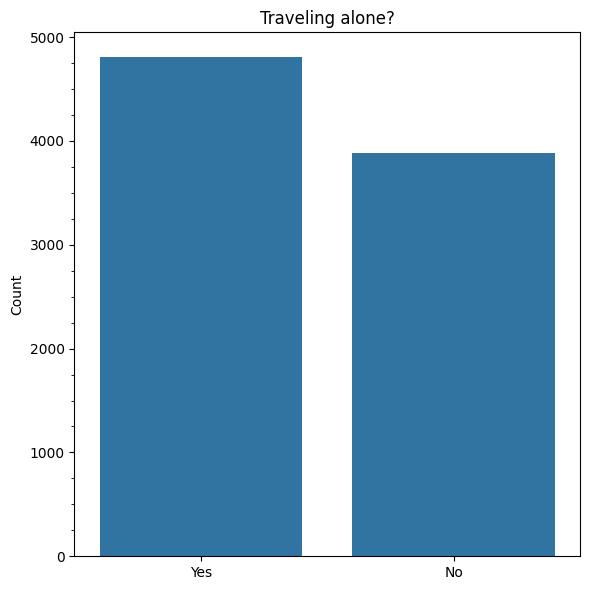

In [15]:
# Number of people traveling alone
fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(x=df_train.get_column("Alone").to_numpy(), order=[True, False], ax=ax)
ax.set_title("Traveling alone?")
ax.set_xticks(ax.get_xticks())  # seems useless but silences a warning
ax.set_xticklabels(["Yes", "No"])
ax.set_ylabel("Count")
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

plt.show()

In [16]:
df_train.get_column("Alone").value_counts(sort=True)

Alone,count
bool,u32
true,4805
false,3888


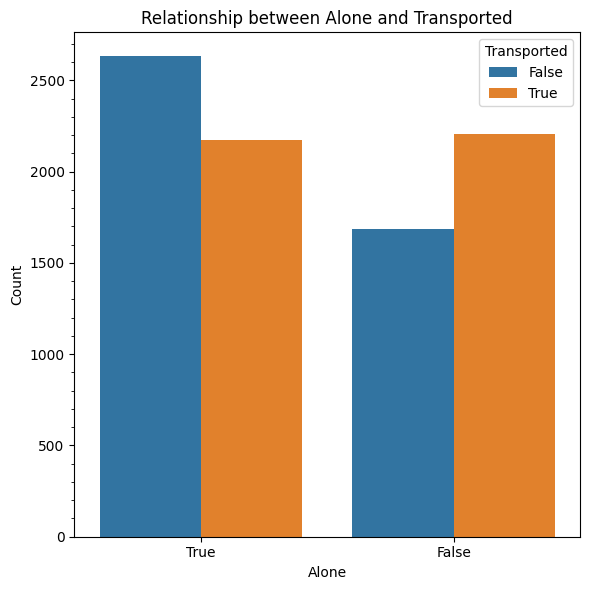

In [17]:
# Relationship with target variable
fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(df_train, x="Alone", hue="Transported", order=[True, False], ax=ax)
ax.set_title("Relationship between Alone and Transported")
ax.set_ylabel("Count")
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

plt.show()

In [18]:
df_crosstab = df_train.select(["Alone", "Transported"]).to_pandas()
pd.crosstab(df_crosstab.Alone, df_crosstab.Transported)

Transported,False,True
Alone,,
False,1684,2204
True,2631,2174


In [19]:
del df_crosstab

In [20]:
# Unique values of `CompanionCount`
companion_count = df_train.get_column("CompanionCount")
companion_count.unique()

CompanionCount
u32
0
1
2
3
4
5
6
7


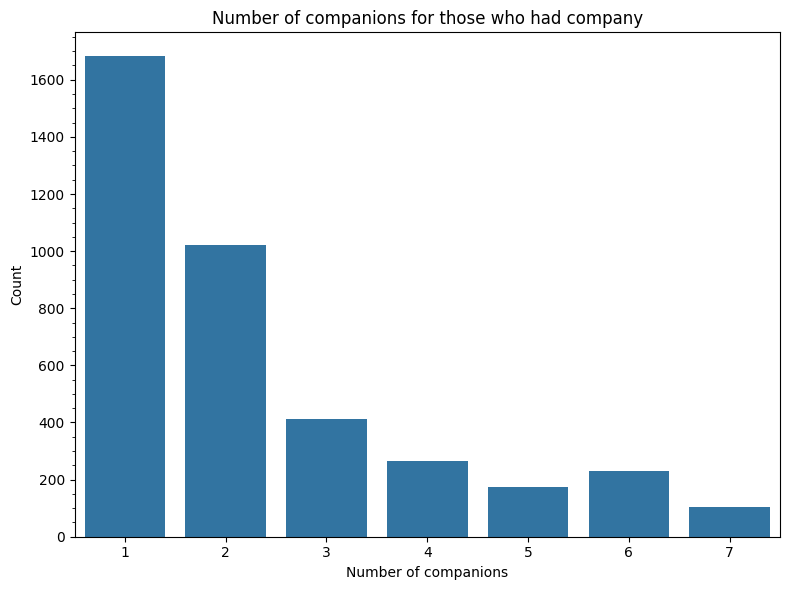

In [21]:
# Visualizing number of companions
fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()

pos_counts = companion_count.filter(companion_count.gt(0)).to_numpy()
sns.countplot(x=pos_counts, order=list(range(1, 8)), ax=ax)
ax.set_title("Number of companions for those who had company")
ax.set_xlabel("Number of companions")
ax.set_ylabel("Count")
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

plt.show()

In [22]:
companion_count.value_counts().sort(by="CompanionCount")

CompanionCount,count
u32,u32
0,4805
1,1682
2,1020
3,412
4,265
5,174
6,231
7,104


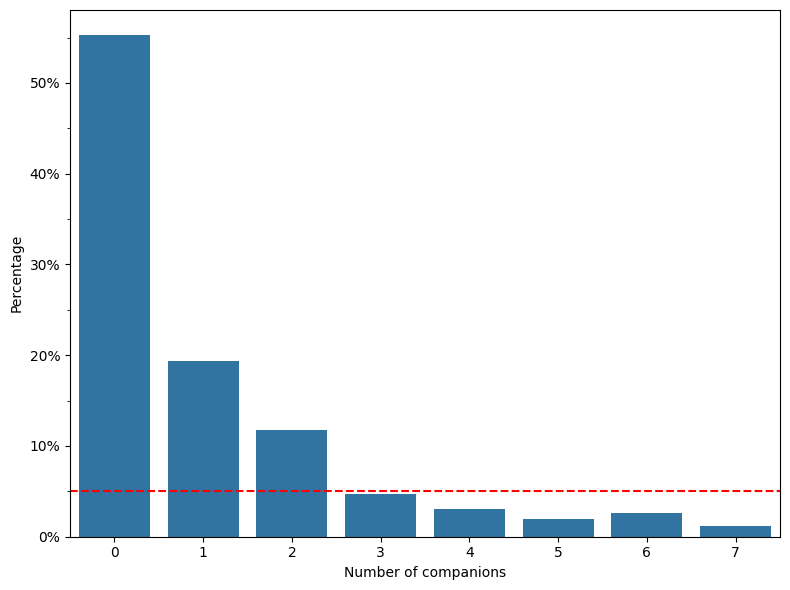

In [23]:
# Identifying infrequent counts
fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(
    df_train.select("CompanionCount"),
    x="CompanionCount",
    order=list(range(8)),
    stat="percent",
    ax=ax,
)
ax.axhline(y=5, color="red", linestyle="--")
ax.set_xlabel("Number of companions")
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(PercentFormatter())
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

plt.show()

In [24]:
# Combine infrequent counts into a single category
df_train = df_train.with_columns(
    CompCntReduced=pl.when(pl.col("CompanionCount").gt(2))
    .then(pl.lit("3+"))
    .otherwise(pl.col("CompanionCount").cast(pl.String))
)

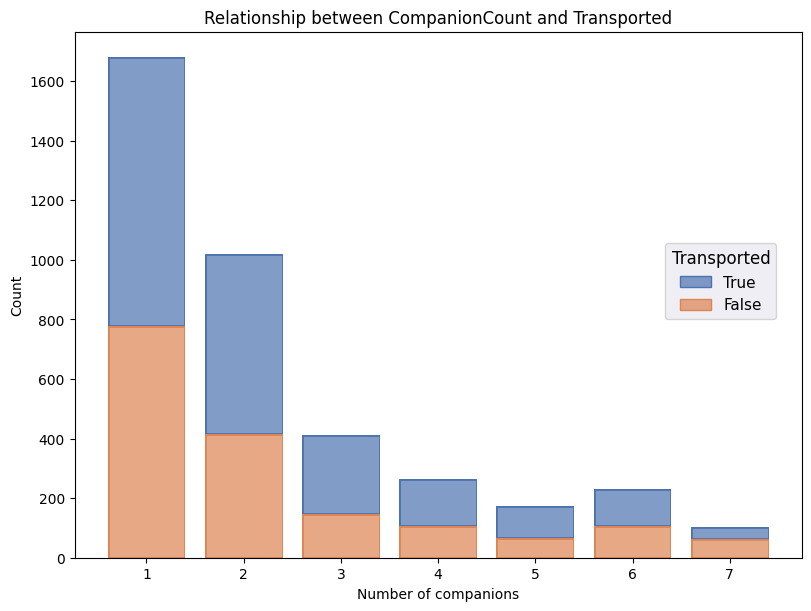

In [25]:
# Relationship with target variable
tmp_df = df_train.select(["CompanionCount", "Transported"]).filter(pl.col("CompanionCount").gt(0))

fig = plt.figure(figsize=(8.0, 6.0))
ax = fig.add_subplot()

p = (
    so.Plot(tmp_df, x="CompanionCount", color="Transported")
    .add(so.Bar(), so.Count(), so.Stack())
    .on(ax)
    .label(
        title="Relationship between CompanionCount and Transported",
        x="Number of companions",
        y="Count",
    )
    .layout(engine="constrained")
)
p.show()

In [26]:
tmp_df = tmp_df.to_pandas()
pd.crosstab(
    tmp_df.Transported,
    tmp_df.CompanionCount,
    margins=True,
    margins_name="Total",
)

CompanionCount,1,2,3,4,5,6,7,Total
Transported,,,,,,,,
False,777,415,148,108,67,106,63,1684
True,905,605,264,157,107,125,41,2204
Total,1682,1020,412,265,174,231,104,3888


In [27]:
del tmp_df

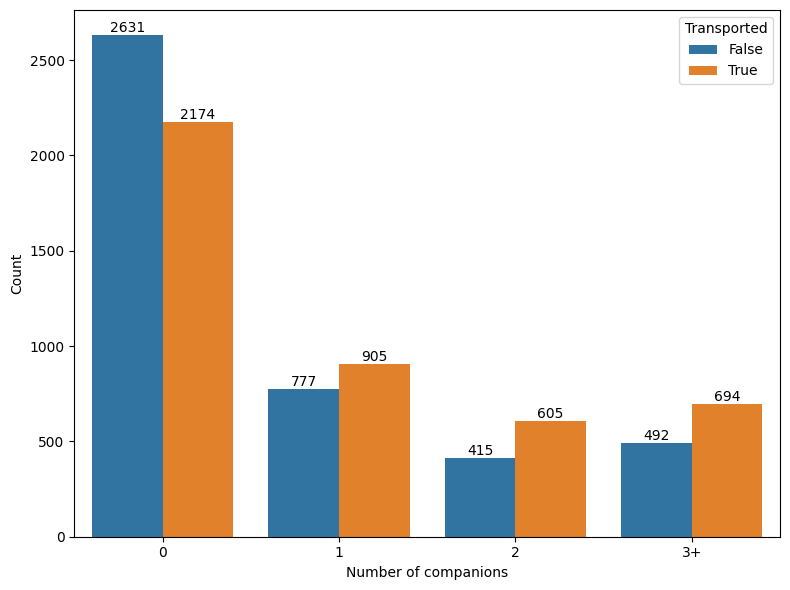

In [28]:
# Relationship between CompCntReduced and Transported
fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(
    df_train,
    x="CompCntReduced",
    hue="Transported",
    order=["0", "1", "2", "3+"],
    ax=ax,
)
ax.set_xlabel("Number of companions")
ax.set_ylabel("Count")

for container in ax.containers:
    ax.bar_label(container)  # pyright: ignore [reportArgumentType]

plt.show()

## `HomePlanet`

In [29]:
# Unique values
df_train.get_column("HomePlanet").unique()

HomePlanet
str
"""Earth"""
"""Europa"""
"""Mars"""
null


In [30]:
# Do passengers who belong to the same group also come from the same home planet?
df_train.select(["Group", "HomePlanet"]).drop_nulls().group_by("Group").agg(
    pl.col("HomePlanet").n_unique().alias("UniquePlanets")
).get_column("UniquePlanets").eq(1).all()

True

In [31]:
# Fix some of the missing values of HomePlanet

# Missing values BEFORE
df_train.get_column("HomePlanet").is_null().sum()

201

In [32]:
# Some of the rows that can be fixed:
df_train.filter(pl.col("Group").str.starts_with("044"), pl.col("Alone").not_()).select(
    ["PassengerId", "HomePlanet"]
)

PassengerId,HomePlanet
str,str
"""0444_01""","""Mars"""
"""0444_02""",null
"""0445_01""","""Earth"""
"""0445_02""",null
"""0448_01""","""Earth"""
"""0448_02""","""Earth"""


In [33]:
# Identify rows that can be fixed, and the new values of HomePlanet
df_1 = df_train.filter(pl.col("HomePlanet").is_null(), pl.col("Alone").not_()).select(
    ["PassengerId", "Group"]
)
df_2 = (
    df_train.filter(
        pl.col("HomePlanet").is_not_null(),
        pl.col("Group").is_in(df_1.get_column("Group").unique()),
    )
    .select(["HomePlanet", "Group"])
    .unique()
)
df_3 = df_1.join(df_2, on="Group", how="inner").select(["PassengerId", "HomePlanet"])
del df_1
del df_2

In [34]:
# Update DataFrame with new values of HomePlanet
df_train = (
    df_train.join(df_3, on="PassengerId", how="left")
    .with_columns(pl.col("HomePlanet_right").fill_null(pl.col("HomePlanet")))
    .drop("HomePlanet")
    .rename({"HomePlanet_right": "HomePlanet"})
)
del df_3

In [35]:
# Quick check
df_train.filter(pl.col("Group").str.starts_with("044"), pl.col("Alone").not_()).select(
    ["PassengerId", "HomePlanet"]
)

PassengerId,HomePlanet
str,str
"""0444_01""","""Mars"""
"""0444_02""","""Mars"""
"""0445_01""","""Earth"""
"""0445_02""","""Earth"""
"""0448_01""","""Earth"""
"""0448_02""","""Earth"""


In [36]:
# Missing values AFTER
df_train.get_column("HomePlanet").is_null().sum()

111

In [37]:
# For the moment, ignore missing values
home_planet = df_train.get_column("HomePlanet").drop_nulls()

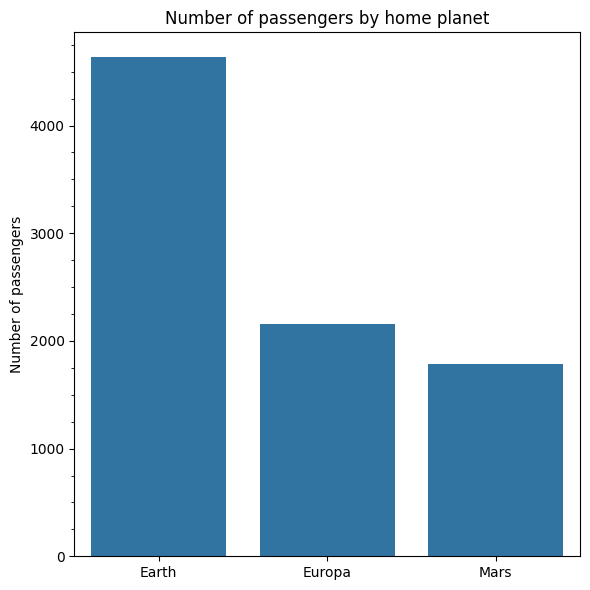

In [38]:
# Visualizing number of passengers by home planet
fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(x=home_planet.to_numpy(), order=["Earth", "Europa", "Mars"], ax=ax)
ax.set_title("Number of passengers by home planet")
ax.set_ylabel("Number of passengers")
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

plt.show()

In [39]:
home_planet.value_counts(sort=True)

HomePlanet,count
str,u32
"""Earth""",4634
"""Europa""",2161
"""Mars""",1787


In [40]:
# Relationship with the target variable

# For this, I need a Pandas DataFrame
tmp_df = (
    df_train.select(
        pl.col("HomePlanet"),
        pl.col("Transported"),
    )
    .filter(pl.col("HomePlanet").is_not_null())
    .to_pandas()
)
# tmp_df.head(10)

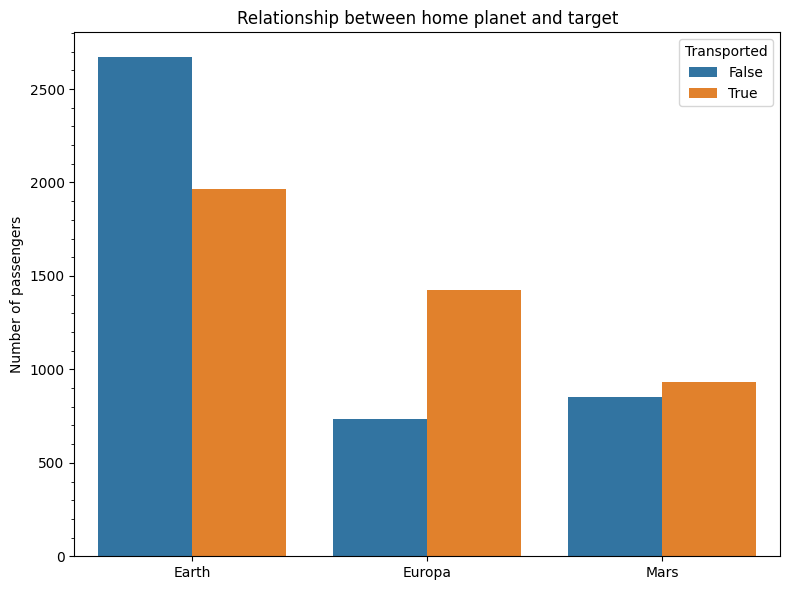

In [41]:
# Visualization
fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(
    tmp_df,
    x="HomePlanet",
    hue="Transported",
    order=["Earth", "Europa", "Mars"],
    ax=ax,
)
ax.set_title("Relationship between home planet and target")
ax.set_xlabel("")
ax.set_ylabel("Number of passengers")
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

plt.show()

In [42]:
# Unfortunately, this function doesn't exist in Polars
pd.crosstab(tmp_df.Transported, tmp_df.HomePlanet)

HomePlanet,Earth,Europa,Mars
Transported,,,
False,2670,735,852
True,1964,1426,935


In [43]:
del tmp_df

## `CryoSleep`

In [44]:
# First, I'm going to do some consistency tests. To do so, I need to know the
# total amount spent by each passenger:
df_total = (
    df_train.select(["CryoSleep", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"])
    .filter(pl.col("CryoSleep").is_not_null())
    .with_columns(TotalSpent=pl.sum_horizontal(pl.col(pl.FLOAT_DTYPES)))
    .select(["CryoSleep", "TotalSpent"])
)
df_total.head(10)

CryoSleep,TotalSpent
bool,f64
false,0.0
false,736.0
false,10383.0
false,5176.0
false,1091.0
false,774.0
false,1584.0
true,0.0
false,1018.0


In [45]:
# Passengers who spent money were NOT in cryo sleep
assert df_total.filter(pl.col("TotalSpent").gt(0.0)).get_column("CryoSleep").not_().all()

In [46]:
# Passengers who were in cryo sleep spent NO MONEY
assert df_total.filter(pl.col("CryoSleep")).get_column("TotalSpent").eq(0.0).all()

In [47]:
# The converse is NOT true: Some passengers who spent no money were awake
df_total.filter(pl.col("TotalSpent").eq(0.0)).get_column("CryoSleep").value_counts(sort=True)

CryoSleep,count
bool,u32
true,3037
false,518


In [48]:
del df_total

In [49]:
# Add TotalSpent column to DataFrame
df_train = df_train.with_columns(
    TotalSpent=pl.sum_horizontal("RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck")
)
assert df_train.get_column("TotalSpent").ge(0.0).all()
df_train.select(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "TotalSpent"]).head(10)

RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent
f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.0,0.0,0.0
109.0,9.0,25.0,549.0,44.0,736.0
43.0,3576.0,0.0,6715.0,49.0,10383.0
0.0,1283.0,371.0,3329.0,193.0,5176.0
303.0,70.0,151.0,565.0,2.0,1091.0
0.0,483.0,0.0,291.0,0.0,774.0
42.0,1539.0,3.0,0.0,0.0,1584.0
0.0,0.0,0.0,0.0,null,0.0
0.0,785.0,17.0,216.0,0.0,1018.0


In [50]:
# Missing values BEFORE
df_train.get_column("CryoSleep").is_null().sum()

217

In [51]:
# Fill some missing CryoSleep values based on TotalSpent
df_cryo = (
    df_train.filter(pl.col("CryoSleep").is_null(), pl.col("TotalSpent").gt(0.0))
    .select(["PassengerId", "CryoSleep"])
    .with_columns(pl.col("CryoSleep").fill_null(False))  # noqa: FBT003
)
df_train = (
    df_train.join(df_cryo, on="PassengerId", how="left")
    .with_columns(pl.col("CryoSleep_right").fill_null(pl.col("CryoSleep")))
    .drop("CryoSleep")
    .rename({"CryoSleep_right": "CryoSleep"})
)
del df_cryo
assert df_train.filter(pl.col("TotalSpent").gt(0.0)).get_column("CryoSleep").not_().all()
df_train.head(10)

PassengerId,Cabin,Destination,Age,VIP,RoomService,FoodCourt,…,Group,CompanionCount,Alone,CompCntReduced,HomePlanet,TotalSpent,CryoSleep
str,str,str,f64,bool,f64,f64,…,str,u32,bool,str,str,f64,bool
"""0001_01""","""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,…,"""0001""",0,true,"""0""","""Europa""",0.0,false
"""0002_01""","""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,…,"""0002""",0,true,"""0""","""Earth""",736.0,false
"""0003_01""","""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,…,"""0003""",1,false,"""1""","""Europa""",10383.0,false
"""0003_02""","""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,…,"""0003""",1,false,"""1""","""Europa""",5176.0,false
"""0004_01""","""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,…,"""0004""",0,true,"""0""","""Earth""",1091.0,false
"""0005_01""","""F/0/P""","""PSO J318.5-22""",44.0,false,0.0,483.0,…,"""0005""",0,true,"""0""","""Earth""",774.0,false
"""0006_01""","""F/2/S""","""TRAPPIST-1e""",26.0,false,42.0,1539.0,…,"""0006""",1,false,"""1""","""Earth""",1584.0,false
"""0006_02""","""G/0/S""","""TRAPPIST-1e""",28.0,false,0.0,0.0,…,"""0006""",1,false,"""1""","""Earth""",0.0,true
"""0007_01""","""F/3/S""","""TRAPPIST-1e""",35.0,false,0.0,785.0,…,"""0007""",0,true,"""0""","""Earth""",1018.0,false


In [52]:
# Missing values AFTER
df_train.get_column("CryoSleep").is_null().sum()

98

In [53]:
# For the moment, ignore missing values that remain
cryo = df_train.get_column("CryoSleep").drop_nulls()

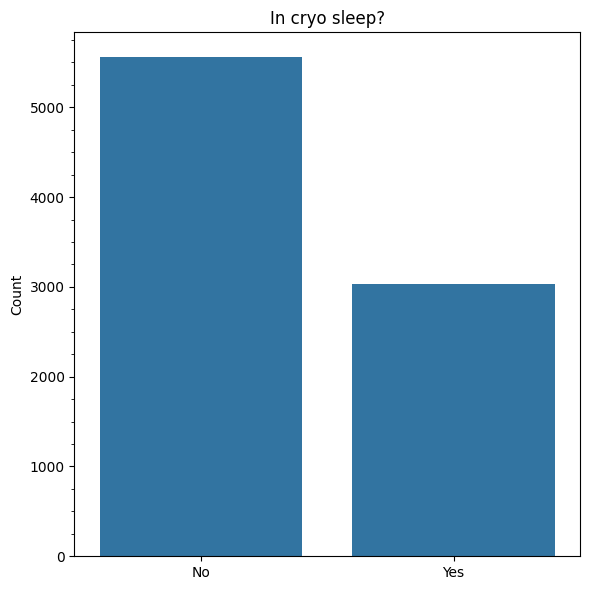

In [54]:
# Visualize number of passengers in cryo sleep
fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(x=cryo.to_numpy(), order=[False, True], ax=ax)
ax.set_title("In cryo sleep?")
ax.set_xticks(ax.get_xticks())  # seems useless but silences a warning
ax.set_xticklabels(["No", "Yes"])
ax.set_ylabel("Count")
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

plt.show()

In [55]:
cryo.value_counts(sort=True)

CryoSleep,count
bool,u32
false,5558
true,3037


In [56]:
# Relationship between CryoSleep and other variables

# Get Pandas DataFrame
tmp_df = df_train.select(["CryoSleep", "Alone", "Transported"]).drop_nulls().to_pandas()
# tmp_df.head(10)

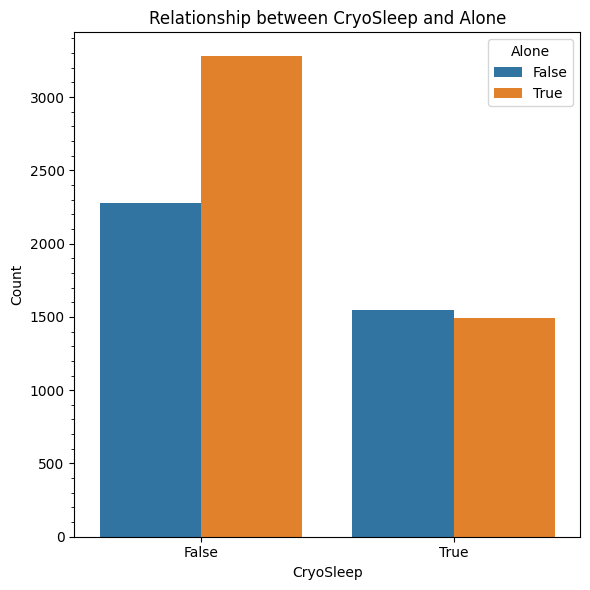

In [57]:
# Relationship between CryoSleep and Alone
fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(tmp_df, x="CryoSleep", hue="Alone", order=[False, True], ax=ax)
ax.set_title("Relationship between CryoSleep and Alone")
ax.set_ylabel("Count")
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

plt.show()

In [58]:
pd.crosstab(tmp_df.CryoSleep, tmp_df.Alone)

Alone,False,True
CryoSleep,,
False,2280,3278
True,1547,1490


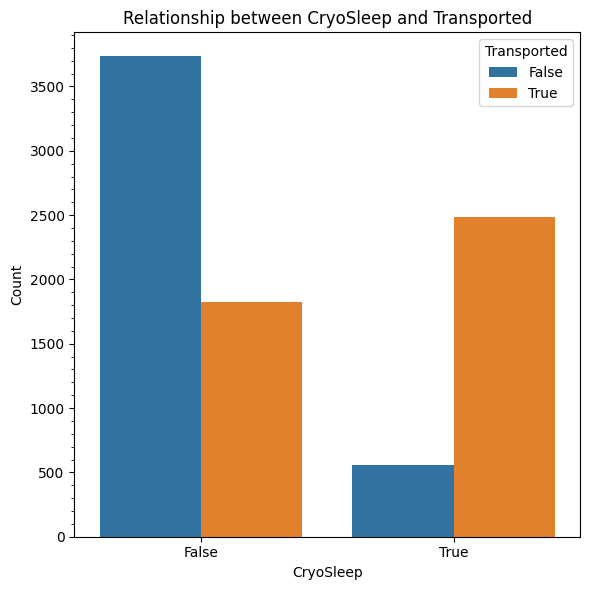

In [59]:
# Relationship between CryoSleep and Transported
fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(tmp_df, x="CryoSleep", hue="Transported", order=[False, True], ax=ax)
ax.set_title("Relationship between CryoSleep and Transported")
ax.set_ylabel("Count")
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

plt.show()

In [60]:
pd.crosstab(tmp_df.CryoSleep, tmp_df.Transported)

Transported,False,True
CryoSleep,,
False,3734,1824
True,554,2483


In [61]:
del tmp_df

## `TotalSpent`

In [62]:
# Summary statistics
df_train.get_column("TotalSpent").describe()

statistic,value
str,f64
"""count""",8693.0
"""null_count""",0.0
"""mean""",1440.866329
"""std""",2803.045694
"""min""",0.0
"""25%""",0.0
"""50%""",716.0
"""75%""",1441.0
"""max""",35987.0


In [63]:
# Power transformation of TotalSpent
pt_total_spent = PowerTransformer().fit_transform(df_train.select("TotalSpent").to_numpy()).flatten()

In [64]:
# Check that new feature is standardized
print(np.mean(pt_total_spent))
print(np.var(pt_total_spent))

-1.1647571591604082e-17
1.0000000000000002


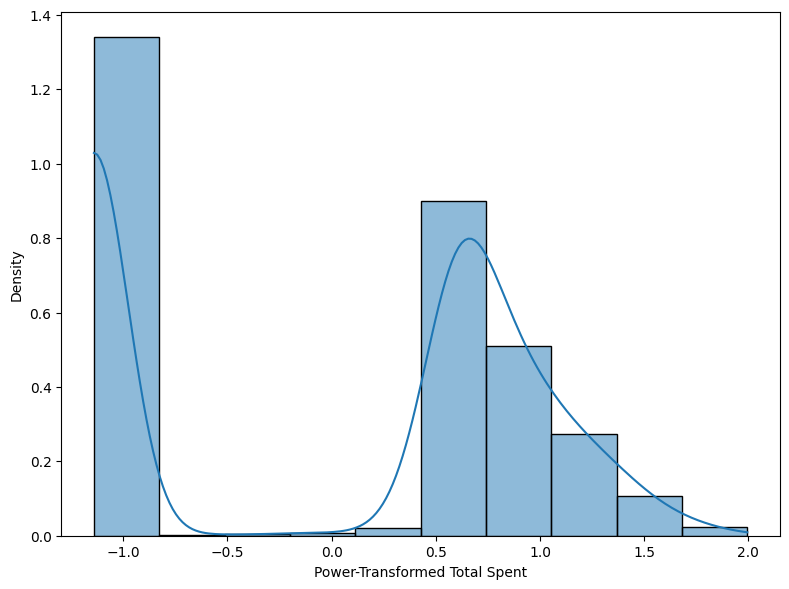

In [65]:
# Visualize distribution of new feature
fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()
sns.histplot(x=pt_total_spent, bins=10, stat="density", kde=True, ax=ax)
ax.set_xlabel("Power-Transformed Total Spent")
plt.show()

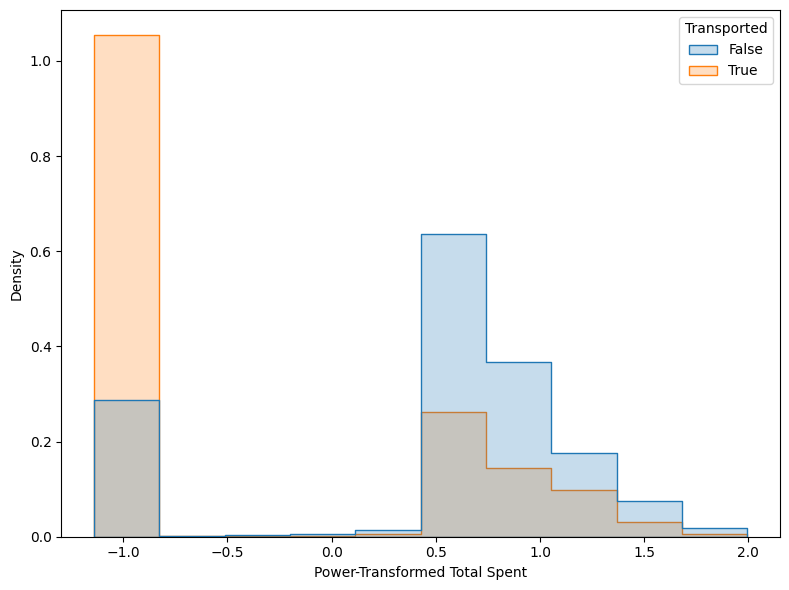

In [66]:
# Relationship with target variable
tmp_df = df_train.select("Transported").with_columns(
    pl.Series(name="PTTotalSpent", values=pt_total_spent, dtype=pl.Float64)
)
del pt_total_spent

fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.histplot(
    tmp_df,
    x="PTTotalSpent",
    hue="Transported",
    bins=10,
    stat="density",
    element="step",
    ax=ax,
)
ax.set_xlabel("Power-Transformed Total Spent")

del tmp_df
plt.show()

## `Cabin`

In [67]:
# Split this feature to create 3 features
df_cabin = (
    df_train.select(["PassengerId", "Cabin"])
    .drop_nulls()
    .with_columns(pl.col("Cabin").str.split("/").list.to_struct().alias("CabinParts"))
    .drop("Cabin")
    .unnest("CabinParts")
    .rename(
        {
            "field_0": "CabinDeck",
            "field_1": "CabinNum",
            "field_2": "CabinSide",
        }
    )
    .with_columns(pl.col("CabinNum").str.to_integer(strict=True))
)
df_cabin.head(10)

PassengerId,CabinDeck,CabinNum,CabinSide
str,str,i64,str
"""0001_01""","""B""",0,"""P"""
"""0002_01""","""F""",0,"""S"""
"""0003_01""","""A""",0,"""S"""
"""0003_02""","""A""",0,"""S"""
"""0004_01""","""F""",1,"""S"""
"""0005_01""","""F""",0,"""P"""
"""0006_01""","""F""",2,"""S"""
"""0006_02""","""G""",0,"""S"""
"""0007_01""","""F""",3,"""S"""


In [68]:
# Quick check
assert df_cabin.get_column("CabinSide").is_in(["P", "S"]).all()

In [69]:
# Add new features to DataFrame
df_train = df_train.join(df_cabin, on="PassengerId", how="left")
del df_cabin
df_train.head(10)

PassengerId,Cabin,Destination,Age,VIP,RoomService,FoodCourt,…,CompCntReduced,HomePlanet,TotalSpent,CryoSleep,CabinDeck,CabinNum,CabinSide
str,str,str,f64,bool,f64,f64,…,str,str,f64,bool,str,i64,str
"""0001_01""","""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,…,"""0""","""Europa""",0.0,false,"""B""",0,"""P"""
"""0002_01""","""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,…,"""0""","""Earth""",736.0,false,"""F""",0,"""S"""
"""0003_01""","""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,…,"""1""","""Europa""",10383.0,false,"""A""",0,"""S"""
"""0003_02""","""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,…,"""1""","""Europa""",5176.0,false,"""A""",0,"""S"""
"""0004_01""","""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,…,"""0""","""Earth""",1091.0,false,"""F""",1,"""S"""
"""0005_01""","""F/0/P""","""PSO J318.5-22""",44.0,false,0.0,483.0,…,"""0""","""Earth""",774.0,false,"""F""",0,"""P"""
"""0006_01""","""F/2/S""","""TRAPPIST-1e""",26.0,false,42.0,1539.0,…,"""1""","""Earth""",1584.0,false,"""F""",2,"""S"""
"""0006_02""","""G/0/S""","""TRAPPIST-1e""",28.0,false,0.0,0.0,…,"""1""","""Earth""",0.0,true,"""G""",0,"""S"""
"""0007_01""","""F/3/S""","""TRAPPIST-1e""",35.0,false,0.0,785.0,…,"""0""","""Earth""",1018.0,false,"""F""",3,"""S"""


In [70]:
# Unique values of CabinDeck
df_train.get_column("CabinDeck").unique()

CabinDeck
str
"""G"""
"""F"""
null
"""A"""
"""B"""
"""E"""
"""C"""
"""D"""
"""T"""


In [71]:
df_train.get_column("CabinDeck").drop_nulls().value_counts(sort=True)

CabinDeck,count
str,u32
"""F""",2794
"""G""",2559
"""E""",876
"""B""",779
"""C""",747
"""D""",478
"""A""",256
"""T""",5


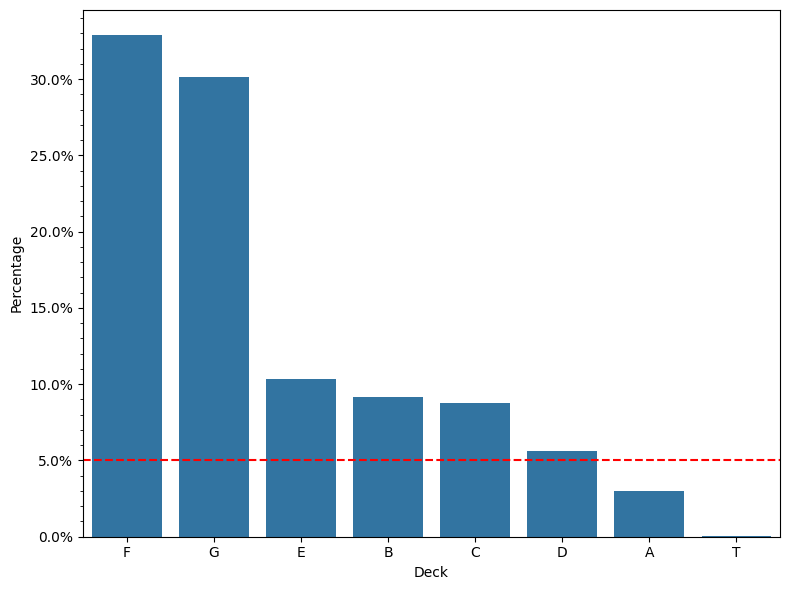

In [72]:
# Identify infrequent categories
fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(
    df_train.select("CabinDeck").drop_nulls(),
    x="CabinDeck",
    order=["F", "G", "E", "B", "C", "D", "A", "T"],
    stat="percent",
    ax=ax,
)
ax.axhline(y=5, color="red", linestyle="--")
ax.set_xlabel("Deck")
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(PercentFormatter())
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

plt.show()

In [73]:
# Relationship between CabinDeck and Transported

# Get Pandas DataFrame
df_mosaic = (
    df_train.select(["CabinDeck", "Transported"])
    .drop_nulls()
    .filter(pl.col("CabinDeck").ne("T"))
    .sort("CabinDeck")
    .with_columns(Transported=pl.when(pl.col("Transported")).then(pl.lit("T")).otherwise(pl.lit("F")))
    .to_pandas()
)
df_mosaic.head(10)

,CabinDeck,Transported
0,A,F
1,A,F
2,A,T
3,A,T
4,A,T
5,A,F
6,A,F
7,A,T
8,A,T
9,A,T


In [74]:
pd.crosstab(df_mosaic.CabinDeck, df_mosaic.Transported, margins=True, margins_name="Total")

Transported,F,T,Total
CabinDeck,,,
A,129,127,256
B,207,572,779
C,239,508,747
D,271,207,478
E,563,313,876
F,1565,1229,2794
G,1238,1321,2559
Total,4212,4277,8489


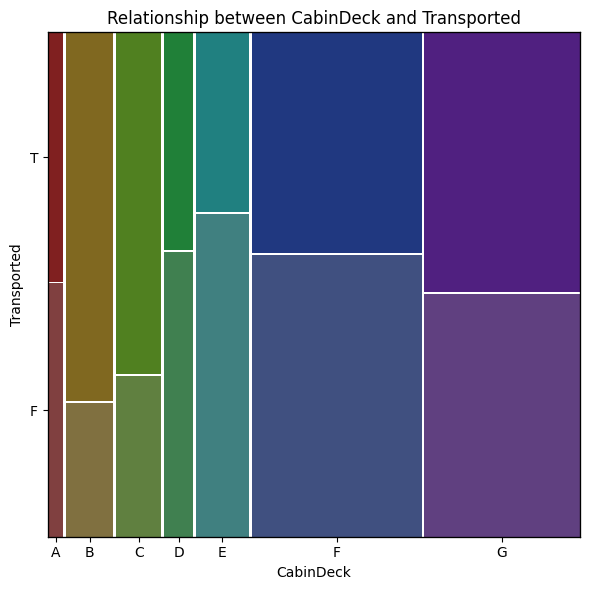

In [75]:
# Create mosaic plot
fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

mosaic(
    df_mosaic,
    ["CabinDeck", "Transported"],
    title="Relationship between CabinDeck and Transported",
    labelizer=lambda _: "",
    ax=ax,
)
ax.set_xlabel("CabinDeck")
ax.set_ylabel("Transported")

del df_mosaic
plt.show()

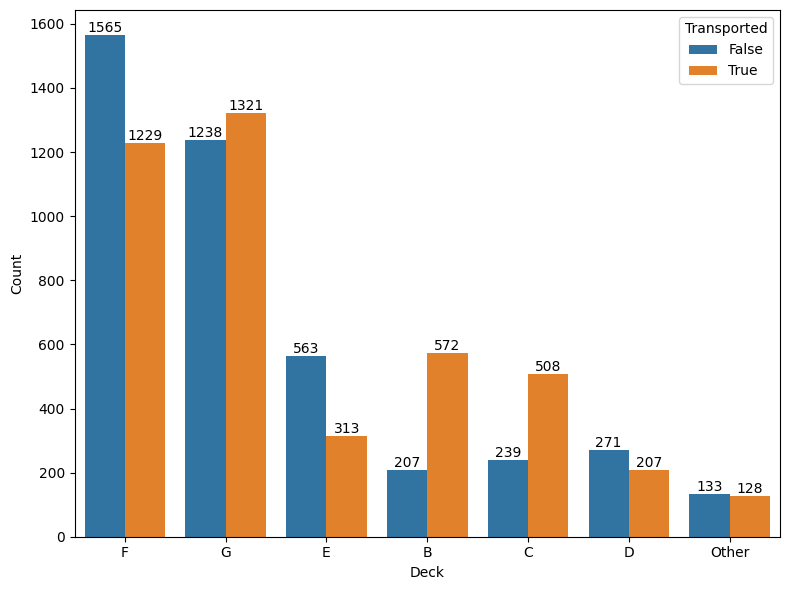

In [76]:
# Combine two categories into one
tmp_df = (
    df_train.select(["CabinDeck", "Transported"])
    .drop_nulls()
    .with_columns(
        CabinDeck=pl.when(pl.col("CabinDeck").is_in(["A", "T"]))
        .then(pl.lit("Other"))
        .otherwise(pl.col("CabinDeck"))
    )
)

fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(
    tmp_df,
    x="CabinDeck",
    hue="Transported",
    order=["F", "G", "E", "B", "C", "D", "Other"],
    ax=ax,
)
ax.set_xlabel("Deck")
ax.set_ylabel("Count")

for container in ax.containers:
    ax.bar_label(container)  # pyright: ignore [reportArgumentType]

del tmp_df
plt.show()

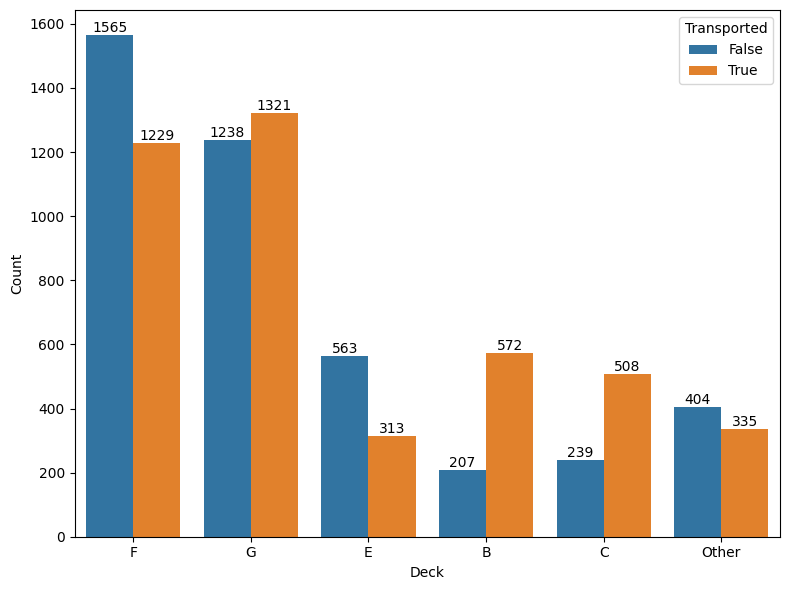

In [77]:
# Combine three categories into one
tmp_df = (
    df_train.select(["CabinDeck", "Transported"])
    .drop_nulls()
    .with_columns(
        CabinDeck=pl.when(pl.col("CabinDeck").is_in(["D", "A", "T"]))
        .then(pl.lit("Other"))
        .otherwise(pl.col("CabinDeck"))
    )
)

fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(
    tmp_df,
    x="CabinDeck",
    hue="Transported",
    order=["F", "G", "E", "B", "C", "Other"],
    ax=ax,
)
ax.set_xlabel("Deck")
ax.set_ylabel("Count")

for container in ax.containers:
    ax.bar_label(container)  # pyright: ignore [reportArgumentType]

del tmp_df
plt.show()

In [78]:
# CabinNum: Number of unique values
df_train.get_column("CabinNum").drop_nulls().n_unique()

1817

In [79]:
# Count encoding for CabinNum
cabin_counts = df_train.get_column("CabinNum").drop_nulls().value_counts().rename({"count": "CabinNumCount"})
df_train = df_train.join(cabin_counts, on="CabinNum", how="left")
del cabin_counts
# df_train.head(10)

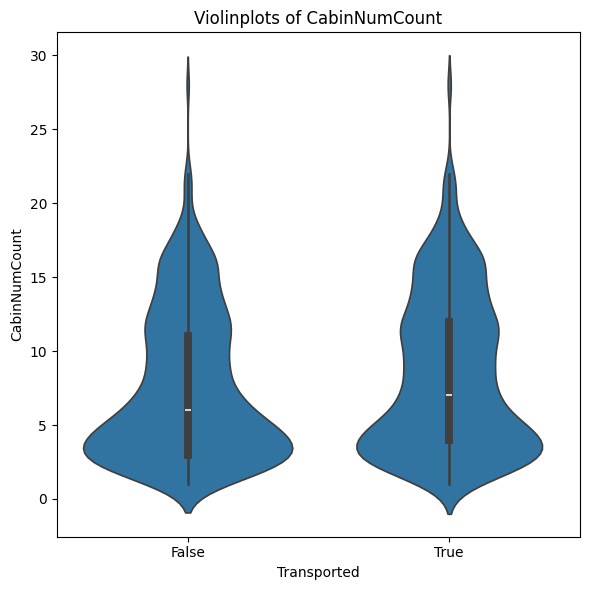

In [80]:
# Visualize count encoding
fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()
sns.violinplot(
    df_train.select(["CabinNumCount", "Transported"]).drop_nulls(),
    x="Transported",
    y="CabinNumCount",
    ax=ax,
)
ax.set_title("Violinplots of CabinNumCount")
plt.show()

In [81]:
# Passengers that belong to the same group were on the same side of the
# spaceship
df_train.select(["CabinSide", "Group"]).drop_nulls().group_by("Group").agg(
    pl.col("CabinSide").n_unique().alias("UniqueSides")
).get_column("UniqueSides").eq(1).all()

True

In [82]:
# Missing values BEFORE
df_train.get_column("CabinSide").is_null().sum()

199

In [83]:
# Fill some missing CabinSide values using group data
df_1 = df_train.select(["CabinSide", "Group"]).drop_nulls().group_by("Group").agg(pl.col("CabinSide").first())
df_2 = df_train.filter(
    pl.col("Alone").not_(), pl.col("CabinSide").is_null(), pl.col("Group").is_in(df_1.get_column("Group"))
).select(["PassengerId", "Group"])
df_3 = df_2.join(df_1, on="Group", how="inner").drop("Group")
df_train = (
    df_train.join(df_3, on="PassengerId", how="left")
    .with_columns(CabinSide=pl.col("CabinSide_right").fill_null(pl.col("CabinSide")))
    .drop("CabinSide_right")
)
del df_1, df_2, df_3

In [84]:
# Missing values AFTER
df_train.get_column("CabinSide").is_null().sum()

99

In [85]:
# Relationship between CabinSide and Transported
tmp_df = df_train.select(["CabinSide", "Transported"]).drop_nulls().to_pandas()
df_crosstab = pd.crosstab(tmp_df.CabinSide, tmp_df.Transported, margins=True, margins_name="Total")
del tmp_df
df_crosstab

Transported,False,True,Total
CabinSide,,,
P,2330,1921,4251
S,1930,2413,4343
Total,4260,4334,8594


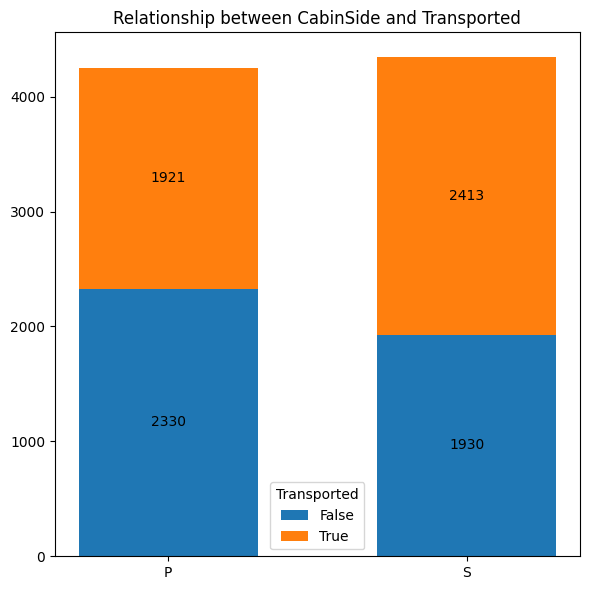

In [86]:
# Plot passenger count
target_counts = {
    "False": df_crosstab.iloc[:-1, 0].to_numpy(),
    "True": df_crosstab.iloc[:-1, 1].to_numpy(),
}
del df_crosstab

width = 0.6
bottom = np.zeros(2)

fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

for target, count in target_counts.items():
    p = ax.bar(("P", "S"), count, width, label=target, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type="center")

ax.set_title("Relationship between CabinSide and Transported")
ax.legend(title="Transported")

plt.show()

## `Destination`

In [87]:
# Unique values of Destination
df_train.get_column("Destination").drop_nulls().unique()

Destination
str
"""PSO J318.5-22"""
"""55 Cancri e"""
"""TRAPPIST-1e"""


In [88]:
# Most of the time, passengers that belong to the same group have the same
# destination. But sometimes there are 2 or 3 different destinations:
df_dest = (
    df_train.select(["Group", "Destination"])
    .drop_nulls()
    .group_by("Group")
    .agg(pl.col("Destination").n_unique().alias("UniqueDestinations"))
)
df_dest.get_column("UniqueDestinations").value_counts(sort=True)

UniqueDestinations,count
u32,u32
1,5397
2,668
3,49


In [89]:
# Use Group data to fill some missing Destination values

# Missing values BEFORE
df_train.get_column("Destination").is_null().sum()

182

In [90]:
groups = df_dest.filter(pl.col("UniqueDestinations").eq(1)).get_column("Group")
del df_dest

df_1 = df_train.filter(pl.col("Destination").is_null(), pl.col("Group").is_in(groups)).select(
    ["PassengerId", "Group"]
)
df_2 = (
    df_train.filter(pl.col("Destination").is_not_null(), pl.col("Group").is_in(groups))
    .select(["Group", "Destination"])
    .unique()
)
df_3 = df_1.join(df_2, on="Group", how="inner").drop("Group")

del groups
del df_1
del df_2

df_train = (
    df_train.join(df_3, on="PassengerId", how="left")
    .with_columns(Destination=pl.col("Destination_right").fill_null(pl.col("Destination")))
    .drop("Destination_right")
)
del df_3

df_train.head(10)

PassengerId,Cabin,Destination,Age,VIP,RoomService,FoodCourt,…,HomePlanet,TotalSpent,CryoSleep,CabinDeck,CabinNum,CabinSide,CabinNumCount
str,str,str,f64,bool,f64,f64,…,str,f64,bool,str,i64,str,u32
"""0001_01""","""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,…,"""Europa""",0.0,false,"""B""",0,"""P""",18
"""0002_01""","""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,…,"""Earth""",736.0,false,"""F""",0,"""S""",18
"""0003_01""","""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,…,"""Europa""",10383.0,false,"""A""",0,"""S""",18
"""0003_02""","""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,…,"""Europa""",5176.0,false,"""A""",0,"""S""",18
"""0004_01""","""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,…,"""Earth""",1091.0,false,"""F""",1,"""S""",15
"""0005_01""","""F/0/P""","""PSO J318.5-22""",44.0,false,0.0,483.0,…,"""Earth""",774.0,false,"""F""",0,"""P""",18
"""0006_01""","""F/2/S""","""TRAPPIST-1e""",26.0,false,42.0,1539.0,…,"""Earth""",1584.0,false,"""F""",2,"""S""",11
"""0006_02""","""G/0/S""","""TRAPPIST-1e""",28.0,false,0.0,0.0,…,"""Earth""",0.0,true,"""G""",0,"""S""",18
"""0007_01""","""F/3/S""","""TRAPPIST-1e""",35.0,false,0.0,785.0,…,"""Earth""",1018.0,false,"""F""",3,"""S""",16


In [91]:
# Missing values AFTER
df_train.get_column("Destination").is_null().sum()

128

In [92]:
# Number of passengers by destination
df_train.get_column("Destination").drop_nulls().value_counts(sort=True)

Destination,count
str,u32
"""TRAPPIST-1e""",5956
"""55 Cancri e""",1807
"""PSO J318.5-22""",802


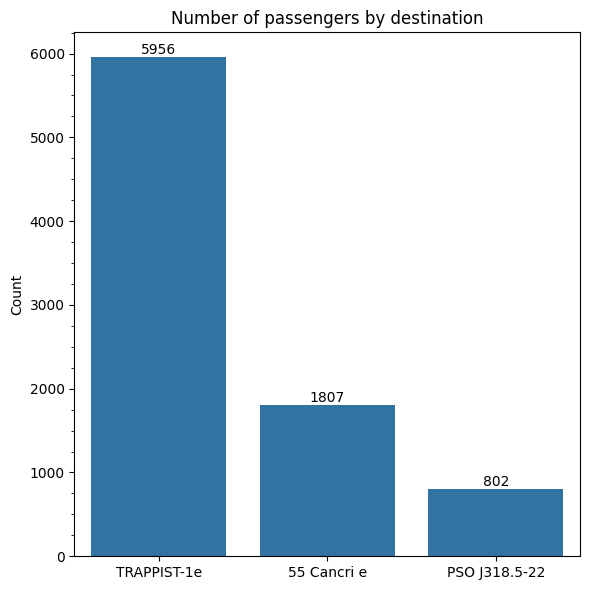

In [93]:
# Visualization
fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(
    df_train.select("Destination").drop_nulls(),
    x="Destination",
    order=["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22"],
    ax=ax,
)
ax.bar_label(ax.containers[0])  # pyright: ignore [reportArgumentType]
ax.set_title("Number of passengers by destination")
ax.set_xlabel("")
ax.set_ylabel("Count")
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

plt.show()

In [94]:
# Relationship with target variable
tmp_df = df_train.select(["Destination", "Transported"]).drop_nulls().to_pandas()
pd.crosstab(tmp_df.Destination, tmp_df.Transported, margins=True, margins_name="Total")

Transported,False,True,Total
Destination,,,
55 Cancri e,704,1103,1807
PSO J318.5-22,399,403,802
TRAPPIST-1e,3145,2811,5956
Total,4248,4317,8565


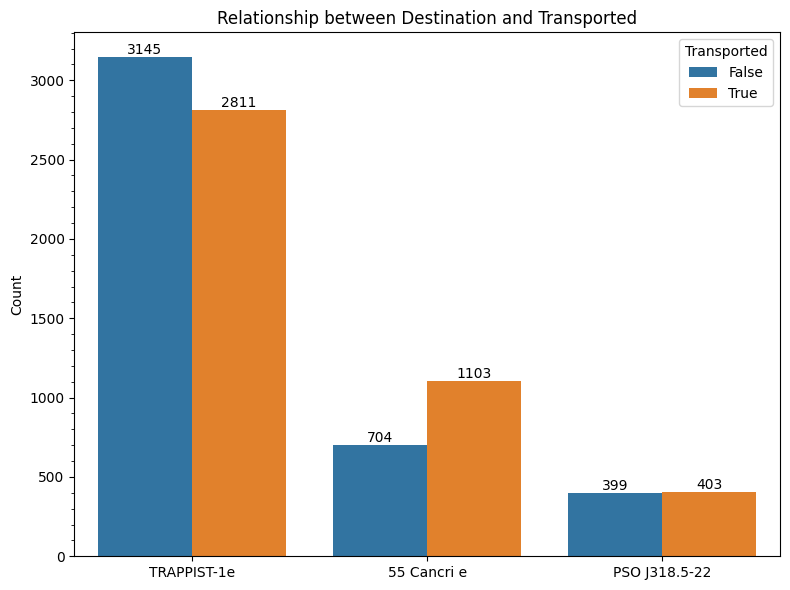

In [95]:
# Visualization
fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(
    tmp_df,
    x="Destination",
    hue="Transported",
    order=["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22"],
    ax=ax,
)
ax.set_title("Relationship between Destination and Transported")
ax.set_xlabel("")
ax.set_ylabel("Count")
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

for container in ax.containers:
    ax.bar_label(container)  # pyright: ignore [reportArgumentType]

del tmp_df
plt.show()

In [96]:
# Relationship between Destination and HomePlanet
df_mosaic = df_train.select(["HomePlanet", "Destination"]).drop_nulls().to_pandas()
pd.crosstab(df_mosaic.HomePlanet, df_mosaic.Destination, margins=True, margins_name="Total")

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Total
HomePlanet,,,,
Earth,694,722,3138,4554
Europa,900,19,1215,2134
Mars,196,50,1523,1769
Total,1790,791,5876,8457


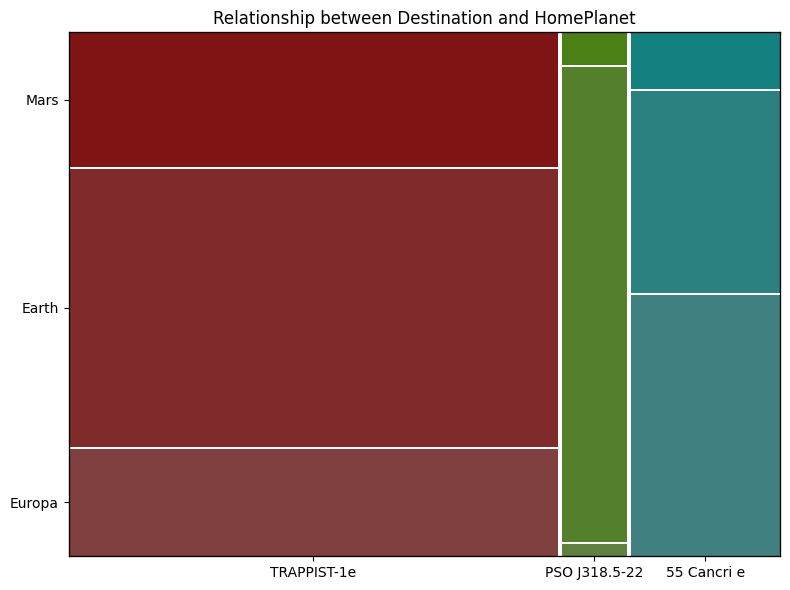

In [97]:
# Create mosaic plot
fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()

mosaic(
    df_mosaic,
    ["Destination", "HomePlanet"],
    title="Relationship between Destination and HomePlanet",
    labelizer=lambda _: "",
    ax=ax,
)

del df_mosaic
plt.show()

## `Age`

In [98]:
# For now, drop missing values
age = df_train.get_column("Age").drop_nulls()
age.head()

Age
f64
39.0
24.0
58.0
33.0
16.0
44.0
26.0
28.0
35.0


In [99]:
# Consistency checks
assert age.ge(0.0).all()
assert (age - age.cast(pl.UInt32)).eq(0.0).all()

In [100]:
# Convert to integer
age = age.cast(pl.UInt32)
age.head()

Age
u32
39
24
58
33
16
44
26
28
35


In [101]:
# Summary statistics
age.describe()

statistic,value
str,f64
"""count""",8514.0
"""null_count""",0.0
"""mean""",28.82793
"""std""",14.489021
"""min""",0.0
"""25%""",19.0
"""50%""",27.0
"""75%""",38.0
"""max""",79.0


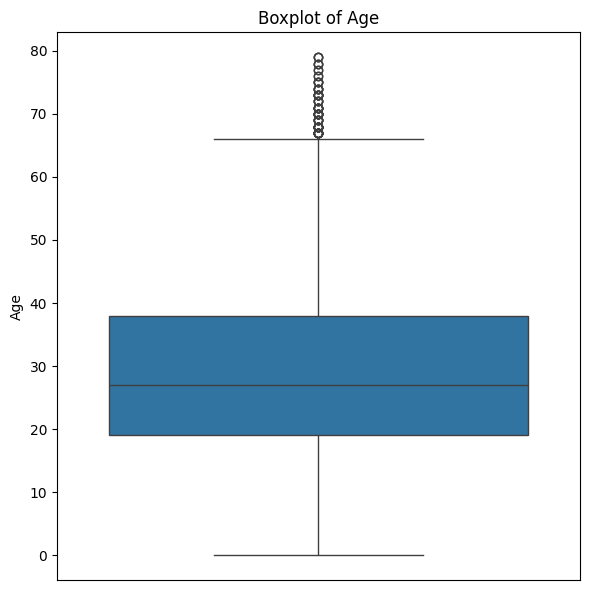

In [102]:
# Create boxplot
fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.boxplot(y=age.to_numpy(), ax=ax)
ax.set_title("Boxplot of Age")
ax.set_xticks([])
ax.set_ylabel("Age")

plt.show()

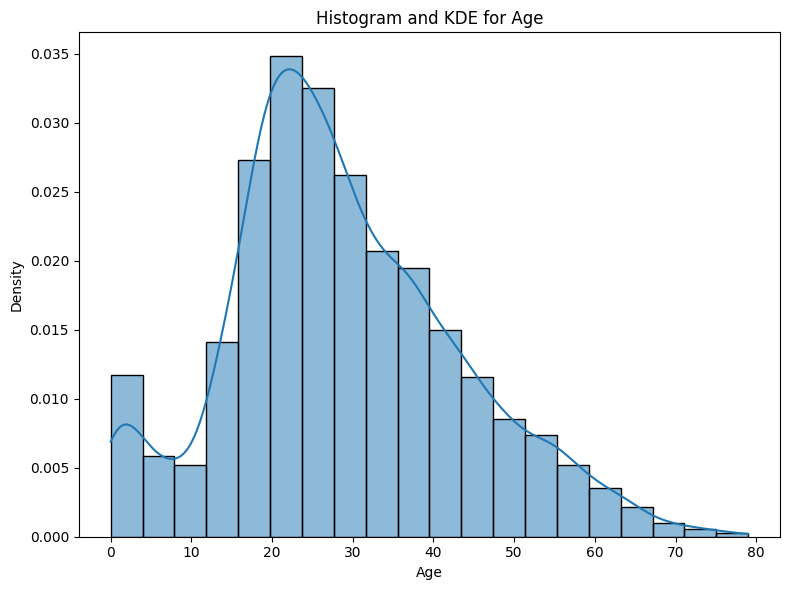

In [103]:
# Histogram and KDE
fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.histplot(x=age.to_numpy(), bins=20, stat="density", kde=True, ax=ax)
ax.set_title("Histogram and KDE for Age")
ax.set_xlabel("Age")

plt.show()

In [104]:
# Relationship with the target variable

# Get Pandas DataFrame
tmp_df = (
    df_train.select(pl.col("Age"), pl.col("Transported"))
    .filter(pl.col("Age").is_not_null())
    .with_columns(pl.col("Age").cast(pl.UInt32))
    .to_pandas()
)
# tmp_df.head(10)

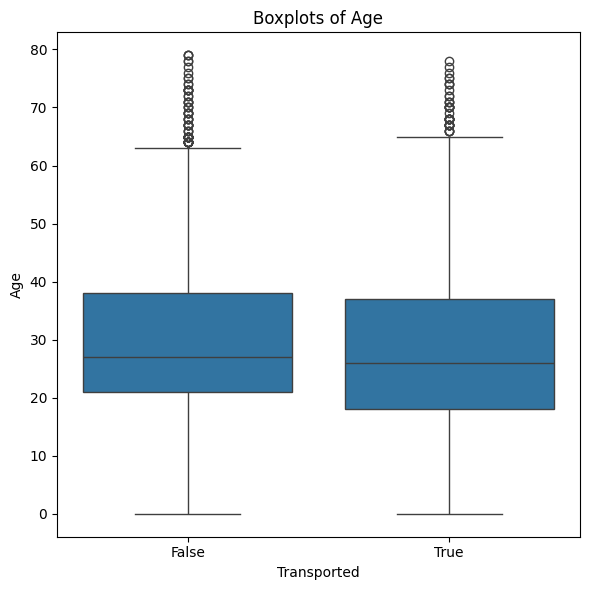

In [105]:
# Create boxplots
fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.boxplot(tmp_df, x="Transported", y="Age", ax=ax)
ax.set_title("Boxplots of Age")

plt.show()

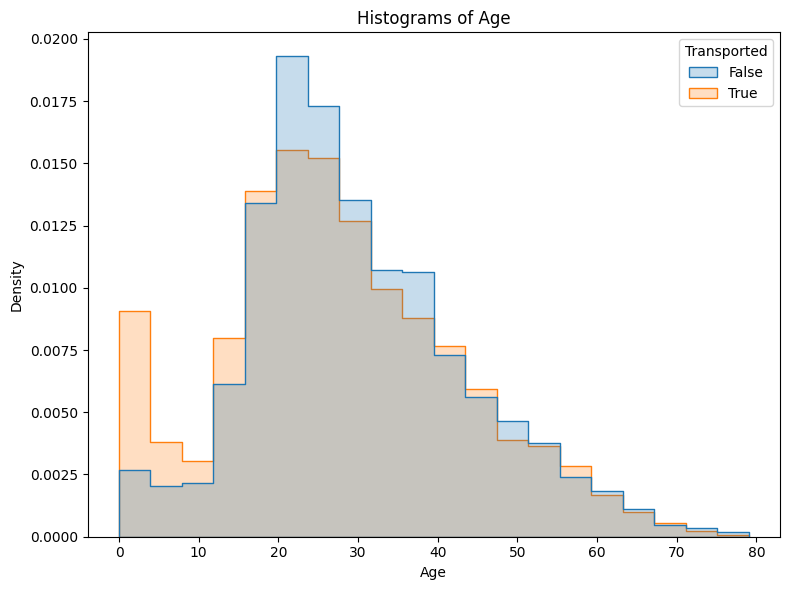

In [106]:
# Create histograms
fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.histplot(
    tmp_df,
    x="Age",
    hue="Transported",
    bins=20,
    stat="density",
    element="step",
    ax=ax,
)
ax.set_title("Histograms of Age")

plt.show()

In [107]:
del tmp_df

Number of bins = 3
Strategy = uniform
Bin edges:
[array([ 0.        , 26.33333333, 52.66666667, 79.        ])]


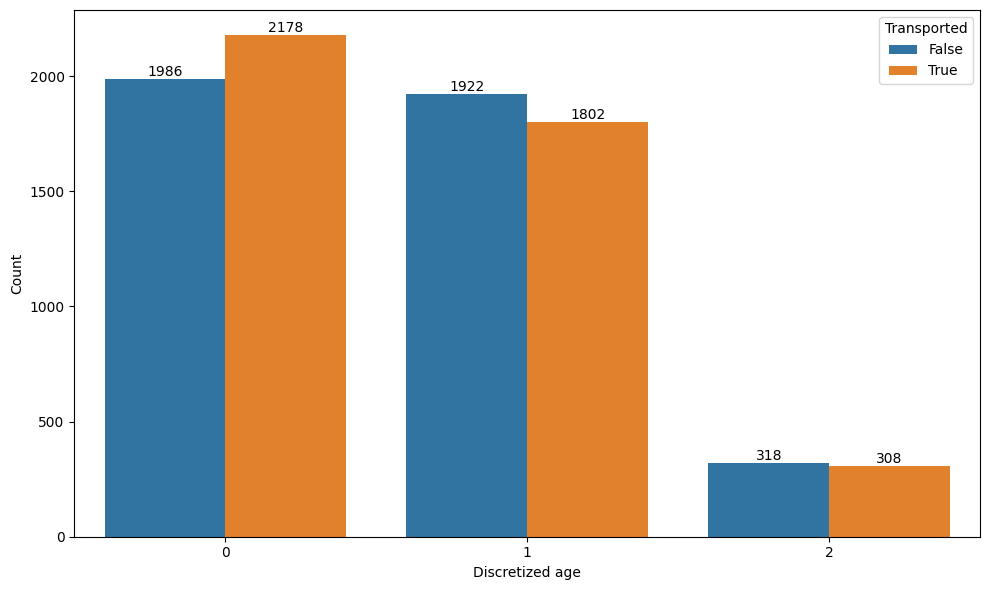

Number of bins = 3
Strategy = quantile
Bin edges:
[array([ 0., 22., 33., 79.])]


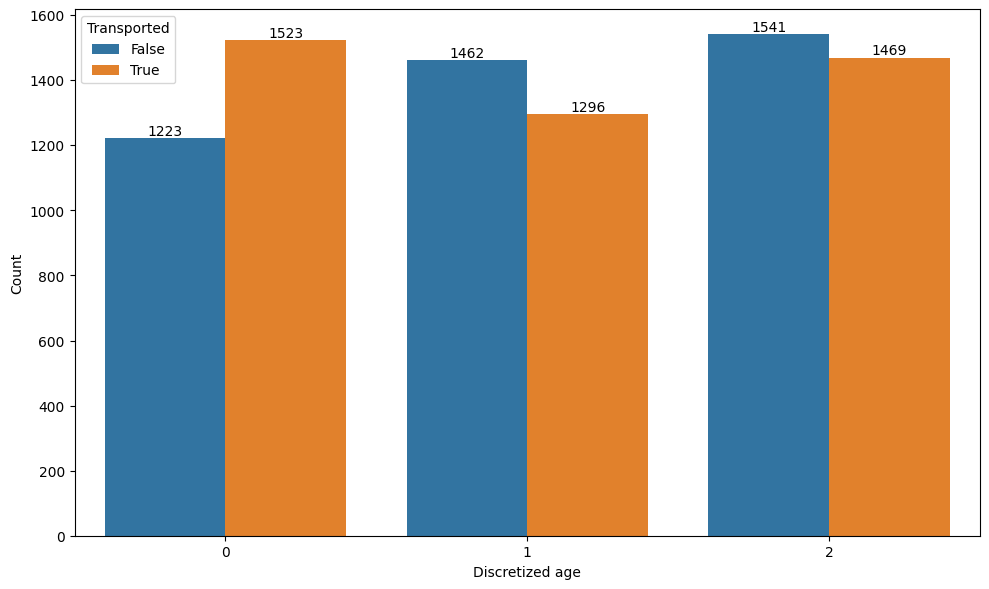

Number of bins = 3
Strategy = kmeans
Bin edges:
[array([ 0.        , 24.2260107 , 42.21237205, 79.        ])]


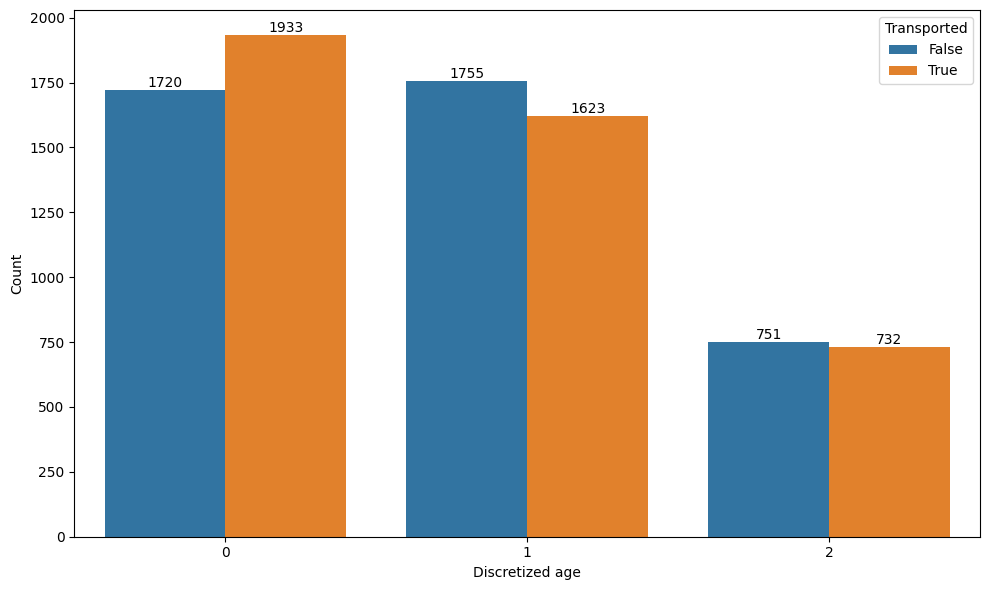

Number of bins = 4
Strategy = uniform
Bin edges:
[array([ 0.  , 19.75, 39.5 , 59.25, 79.  ])]


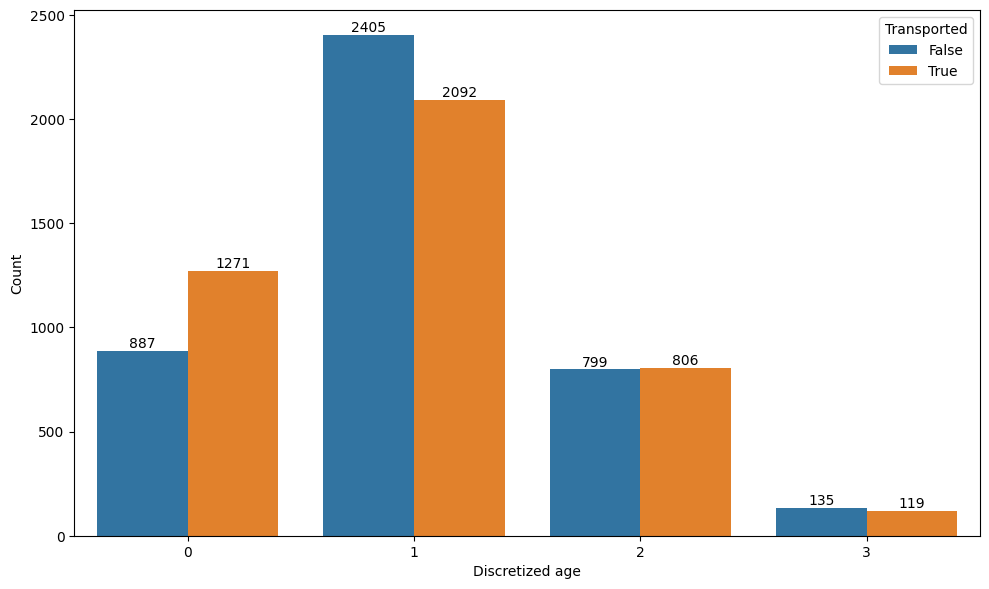

Number of bins = 4
Strategy = quantile
Bin edges:
[array([ 0., 19., 27., 38., 79.])]


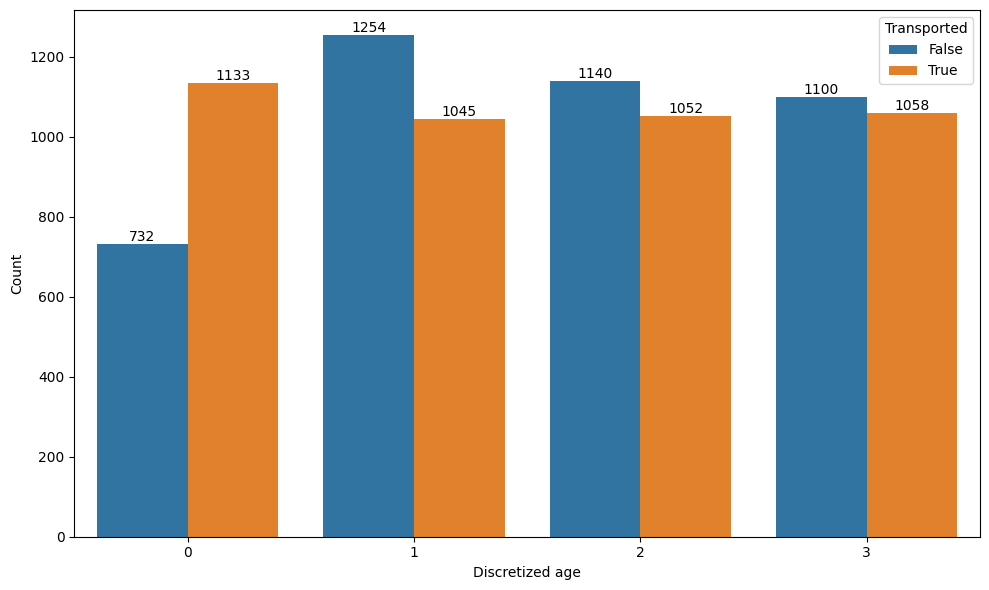

Number of bins = 4
Strategy = kmeans
Bin edges:
[array([ 0.        , 16.21251334, 31.09246895, 47.26697252, 79.        ])]


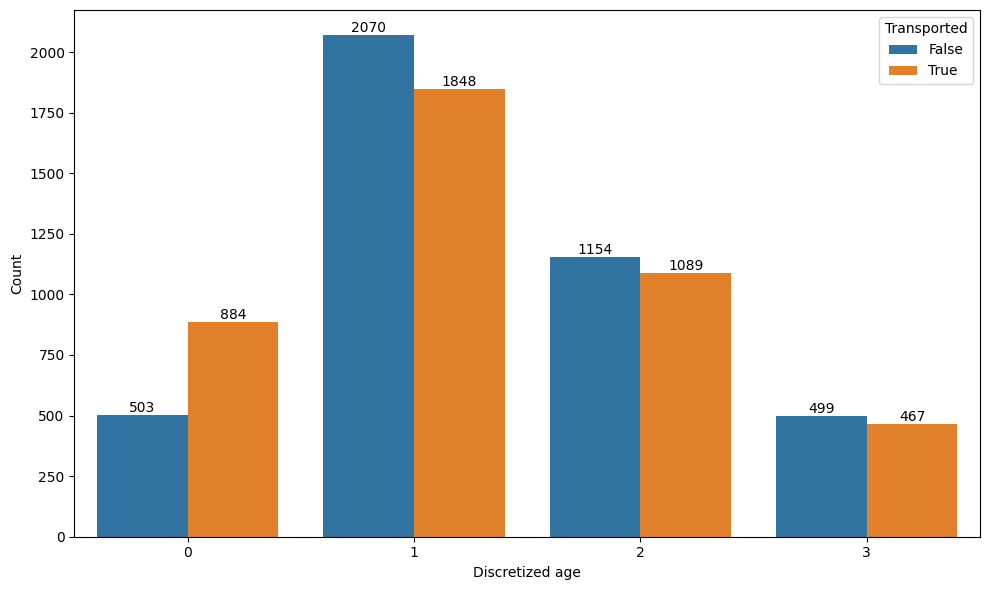

Number of bins = 5
Strategy = uniform
Bin edges:
[array([ 0. , 15.8, 31.6, 47.4, 63.2, 79. ])]


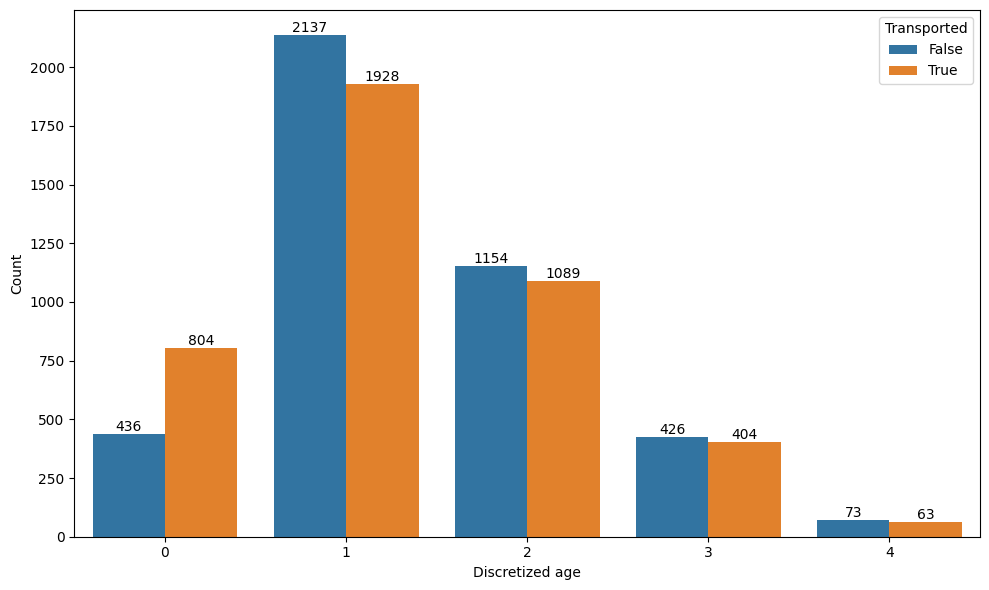

Number of bins = 5
Strategy = quantile
Bin edges:
[array([ 0., 18., 24., 31., 41., 79.])]


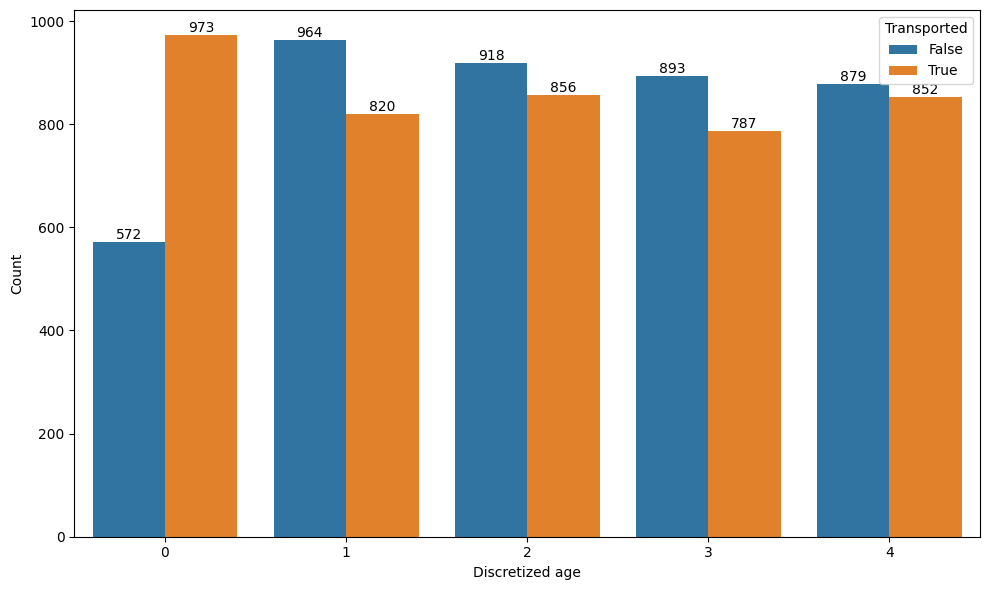

Number of bins = 5
Strategy = kmeans
Bin edges:
[array([ 0.        , 15.05990884, 28.15945533, 40.01735897, 53.07230149,
        79.        ])                                                   ]


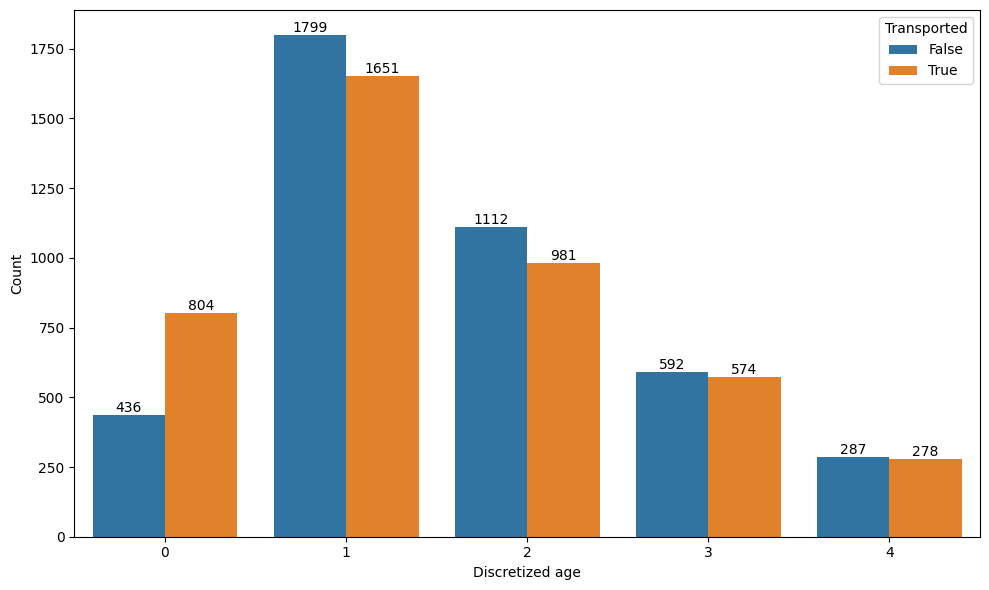

In [108]:
# Comparing approaches to Age discretization
for n_bins, strategy in product([3, 4, 5], ["uniform", "quantile", "kmeans"]):
    print(f"Number of bins = {n_bins}")
    print(f"Strategy = {strategy}")

    discretizer = KBinsDiscretizer(n_bins=n_bins, strategy=strategy, encode="ordinal", random_state=333)
    disc_ages = discretizer.fit_transform(df_train.select("Age").drop_nulls().to_numpy()).flatten()

    print("Bin edges:")
    print(discretizer.bin_edges_)

    tmp_df = (
        df_train.filter(pl.col("Age").is_not_null())
        .select("Transported")
        .with_columns(pl.Series(name="DiscretizedAge", values=disc_ages, dtype=pl.UInt32))
    )

    fig = plt.figure(figsize=(10.0, 6.0), layout="tight")
    ax = fig.add_subplot()

    sns.countplot(tmp_df, x="DiscretizedAge", hue="Transported", ax=ax)
    ax.set_xlabel("Discretized age")
    ax.set_ylabel("Count")

    for container in ax.containers:
        ax.bar_label(container)  # pyright: ignore [reportArgumentType]

    plt.show()

## `VIP`

In [109]:
# Most passengers don't have VIP status
df_train.get_column("VIP").drop_nulls().value_counts(sort=True)

VIP,count
bool,u32
false,8291
true,199


In [110]:
# No VIP passenger is from Earth
df_train.select(["VIP", "HomePlanet"]).drop_nulls().filter(pl.col("VIP")).get_column("HomePlanet").ne(
    "Earth"
).all()

True

In [111]:
df_test.select(["VIP", "HomePlanet"]).drop_nulls().filter(pl.col("VIP")).get_column("HomePlanet").ne(
    "Earth"
).all()

True

In [112]:
# Fix some of the missing values of VIP

# Missing values BEFORE
df_train.get_column("VIP").is_null().sum()

203

In [113]:
tmp_df = (
    df_train.filter(pl.col("VIP").is_null(), pl.col("HomePlanet").eq("Earth"))
    .select("PassengerId")
    .with_columns(VIP=pl.lit(False))  # noqa: FBT003
)
df_train = (
    df_train.join(tmp_df, on="PassengerId", how="left")
    .with_columns(VIP=pl.col("VIP_right").fill_null(pl.col("VIP")))
    .drop("VIP_right")
)
del tmp_df

In [114]:
# Missing values AFTER
df_train.get_column("VIP").is_null().sum()

88

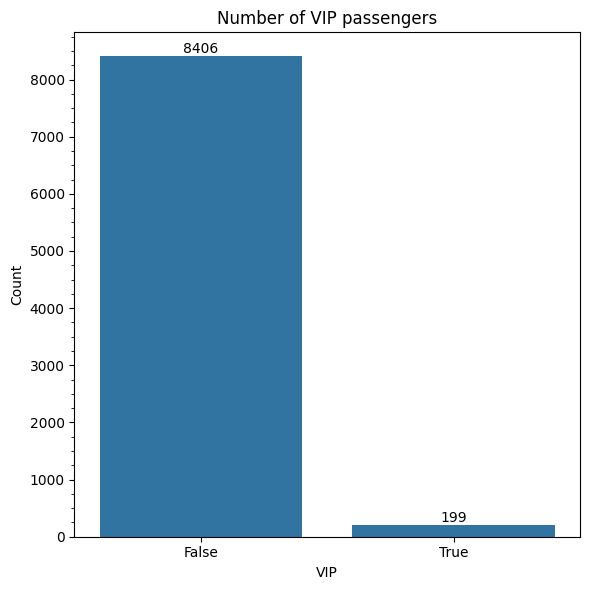

In [115]:
# Number of VIP passengers
fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(df_train.select("VIP").drop_nulls(), x="VIP", ax=ax)
ax.bar_label(ax.containers[0])  # pyright: ignore [reportArgumentType]
ax.set_title("Number of VIP passengers")
ax.set_ylabel("Count")
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

plt.show()

In [116]:
# Relationship with target variable
tmp_df = df_train.select(["VIP", "Transported"]).drop_nulls().to_pandas()
pd.crosstab(tmp_df.VIP, tmp_df.Transported)

Transported,False,True
VIP,,
False,4161,4245
True,123,76


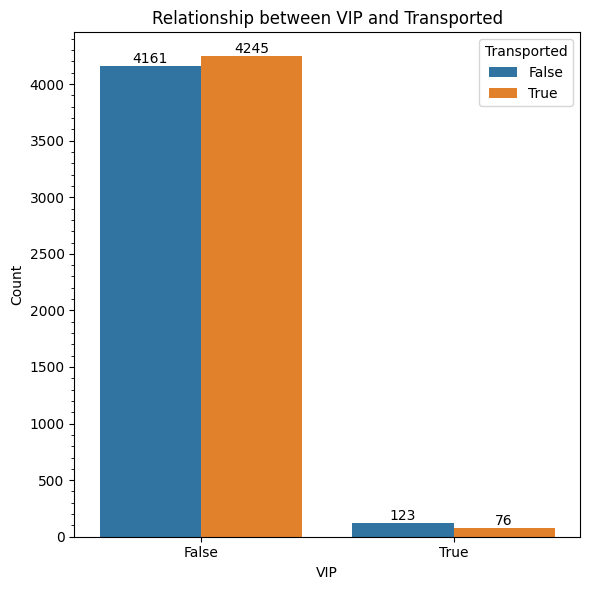

In [117]:
fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(tmp_df, x="VIP", hue="Transported", ax=ax)
ax.set_title("Relationship between VIP and Transported")
ax.set_ylabel("Count")
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

for container in ax.containers:
    ax.bar_label(container)  # pyright: ignore [reportArgumentType]

del tmp_df
plt.show()

In [118]:
# Most VIP passengers were awake (not in cryo sleep)
df_train.select(["VIP", "CryoSleep"]).drop_nulls().filter(pl.col("VIP")).get_column("CryoSleep").value_counts(
    sort=True
)

CryoSleep,count
bool,u32
false,178
true,21


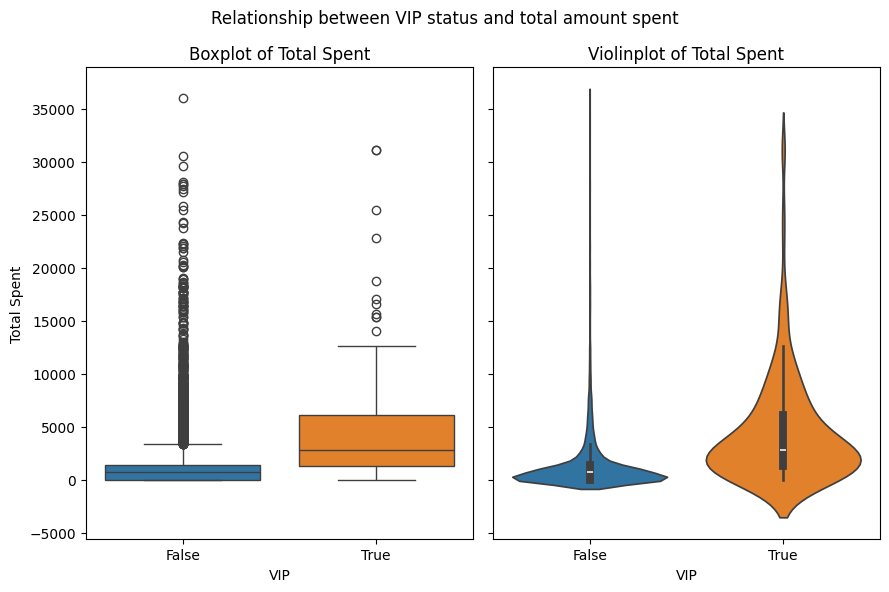

In [119]:
# Relationship between VIP and TotalSpent
tmp_df = df_train.select(["VIP", "TotalSpent"]).drop_nulls()
fig = plt.figure(figsize=(9.0, 6.0), layout="tight")

ax_1 = fig.add_subplot(121)
sns.boxplot(tmp_df, x="VIP", y="TotalSpent", hue="VIP", ax=ax_1)
ax_1.set_title("Boxplot of Total Spent")
ax_1.set_ylabel("Total Spent")
ax_1.get_legend().remove()

ax_2 = fig.add_subplot(122, sharey=ax_1)
sns.violinplot(tmp_df, x="VIP", y="TotalSpent", hue="VIP", ax=ax_2)
ax_2.set_title("Violinplot of Total Spent")
ax_2.set_ylabel("")
plt.setp(ax_2.get_yticklabels(), visible=False)
ax_2.get_legend().remove()

del tmp_df
fig.suptitle("Relationship between VIP status and total amount spent")

plt.show()

## `RoomService`

In [120]:
# Missing values BEFORE
df_train.get_column("RoomService").is_null().sum()

181

In [121]:
# Fill some missing values based on CryoSleep
df_1 = (
    df_train.filter(pl.col("CryoSleep"), pl.col("RoomService").is_null())
    .select("PassengerId")
    .with_columns(RoomService=pl.lit(0.0))
)
df_train = (
    df_train.join(df_1, on="PassengerId", how="left")
    .with_columns(RoomService=pl.col("RoomService_right").fill_null(pl.col("RoomService")))
    .drop("RoomService_right")
)
del df_1
df_train.head(10)

PassengerId,Cabin,Destination,Age,VIP,RoomService,FoodCourt,…,HomePlanet,TotalSpent,CryoSleep,CabinDeck,CabinNum,CabinSide,CabinNumCount
str,str,str,f64,bool,f64,f64,…,str,f64,bool,str,i64,str,u32
"""0001_01""","""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,…,"""Europa""",0.0,false,"""B""",0,"""P""",18
"""0002_01""","""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,…,"""Earth""",736.0,false,"""F""",0,"""S""",18
"""0003_01""","""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,…,"""Europa""",10383.0,false,"""A""",0,"""S""",18
"""0003_02""","""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,…,"""Europa""",5176.0,false,"""A""",0,"""S""",18
"""0004_01""","""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,…,"""Earth""",1091.0,false,"""F""",1,"""S""",15
"""0005_01""","""F/0/P""","""PSO J318.5-22""",44.0,false,0.0,483.0,…,"""Earth""",774.0,false,"""F""",0,"""P""",18
"""0006_01""","""F/2/S""","""TRAPPIST-1e""",26.0,false,42.0,1539.0,…,"""Earth""",1584.0,false,"""F""",2,"""S""",11
"""0006_02""","""G/0/S""","""TRAPPIST-1e""",28.0,false,0.0,0.0,…,"""Earth""",0.0,true,"""G""",0,"""S""",18
"""0007_01""","""F/3/S""","""TRAPPIST-1e""",35.0,false,0.0,785.0,…,"""Earth""",1018.0,false,"""F""",3,"""S""",16


In [122]:
# Missing values AFTER
df_train.get_column("RoomService").is_null().sum()

113

In [123]:
# Summary statistics
df_train.get_column("RoomService").drop_nulls().describe()

statistic,value
str,f64
"""count""",8580.0
"""null_count""",0.0
"""mean""",222.906876
"""std""",664.36893
"""min""",0.0
"""25%""",0.0
"""50%""",0.0
"""75%""",44.0
"""max""",14327.0


In [124]:
# Clearly, this feature is dominated by zeros
df_train.get_column("RoomService").drop_nulls().eq(0.0).rename("EqualToZero").value_counts(sort=True)

EqualToZero,count
bool,u32
true,5645
false,2935


In [125]:
# Power transformation of RoomService
pt_room_service = (
    PowerTransformer().fit_transform(df_train.select("RoomService").drop_nulls().to_numpy()).flatten()
)

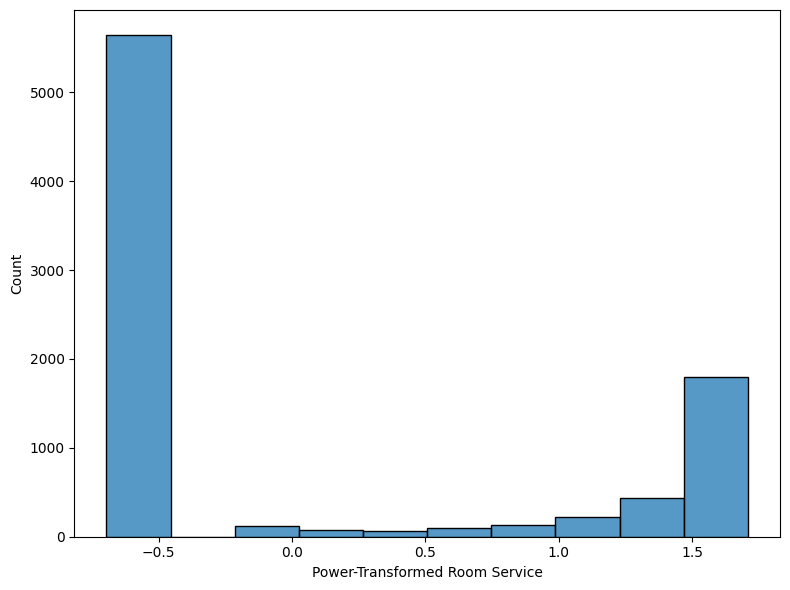

In [126]:
# Visualize distribution of new feature
fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()
sns.histplot(x=pt_room_service, bins=10, ax=ax)
ax.set_xlabel("Power-Transformed Room Service")
plt.show()

In [127]:
del pt_room_service

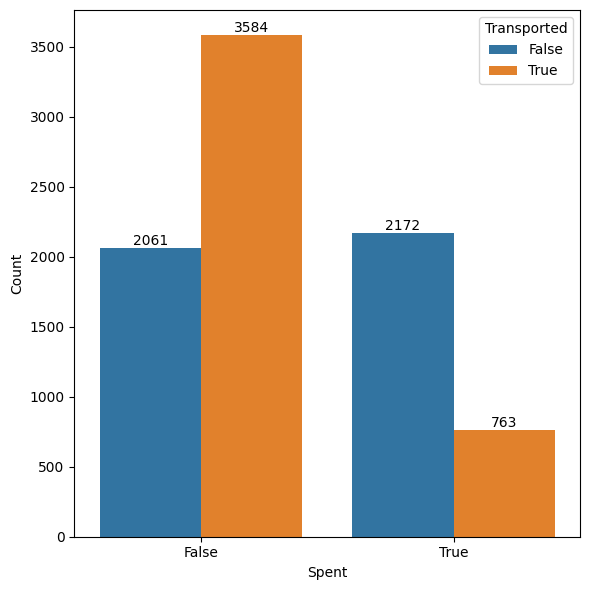

In [128]:
# Derive a binary feature from RoomService
tmp_df = (
    df_train.select(["RoomService", "Transported"])
    .drop_nulls()
    .with_columns(Spent=pl.col("RoomService").gt(0.0))
    .drop("RoomService")
)

fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(tmp_df, x="Spent", hue="Transported", ax=ax)
ax.set_ylabel("Count")

for container in ax.containers:
    ax.bar_label(container)  # pyright: ignore [reportArgumentType]

del tmp_df
plt.show()

## `FoodCourt`

In [129]:
# Missing values BEFORE
df_train.get_column("FoodCourt").is_null().sum()

183

In [130]:
# Fill some missing values based on CryoSleep
df_1 = (
    df_train.filter(pl.col("CryoSleep"), pl.col("FoodCourt").is_null())
    .select("PassengerId")
    .with_columns(FoodCourt=pl.lit(0.0))
)
df_train = (
    df_train.join(df_1, on="PassengerId", how="left")
    .with_columns(FoodCourt=pl.col("FoodCourt_right").fill_null(pl.col("FoodCourt")))
    .drop("FoodCourt_right")
)
del df_1
df_train.head(10)

PassengerId,Cabin,Destination,Age,VIP,RoomService,FoodCourt,…,HomePlanet,TotalSpent,CryoSleep,CabinDeck,CabinNum,CabinSide,CabinNumCount
str,str,str,f64,bool,f64,f64,…,str,f64,bool,str,i64,str,u32
"""0001_01""","""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,…,"""Europa""",0.0,false,"""B""",0,"""P""",18
"""0002_01""","""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,…,"""Earth""",736.0,false,"""F""",0,"""S""",18
"""0003_01""","""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,…,"""Europa""",10383.0,false,"""A""",0,"""S""",18
"""0003_02""","""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,…,"""Europa""",5176.0,false,"""A""",0,"""S""",18
"""0004_01""","""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,…,"""Earth""",1091.0,false,"""F""",1,"""S""",15
"""0005_01""","""F/0/P""","""PSO J318.5-22""",44.0,false,0.0,483.0,…,"""Earth""",774.0,false,"""F""",0,"""P""",18
"""0006_01""","""F/2/S""","""TRAPPIST-1e""",26.0,false,42.0,1539.0,…,"""Earth""",1584.0,false,"""F""",2,"""S""",11
"""0006_02""","""G/0/S""","""TRAPPIST-1e""",28.0,false,0.0,0.0,…,"""Earth""",0.0,true,"""G""",0,"""S""",18
"""0007_01""","""F/3/S""","""TRAPPIST-1e""",35.0,false,0.0,785.0,…,"""Earth""",1018.0,false,"""F""",3,"""S""",16


In [131]:
# Missing values AFTER
df_train.get_column("FoodCourt").is_null().sum()

113

In [132]:
# Summary statistics
df_train.get_column("FoodCourt").drop_nulls().describe()

statistic,value
str,f64
"""count""",8580.0
"""null_count""",0.0
"""mean""",454.339977
"""std""",1605.430304
"""min""",0.0
"""25%""",0.0
"""50%""",0.0
"""75%""",70.0
"""max""",29813.0


In [133]:
# Power transformation of FoodCourt
pt_food_court = (
    PowerTransformer().fit_transform(df_train.select("FoodCourt").drop_nulls().to_numpy()).flatten()
)

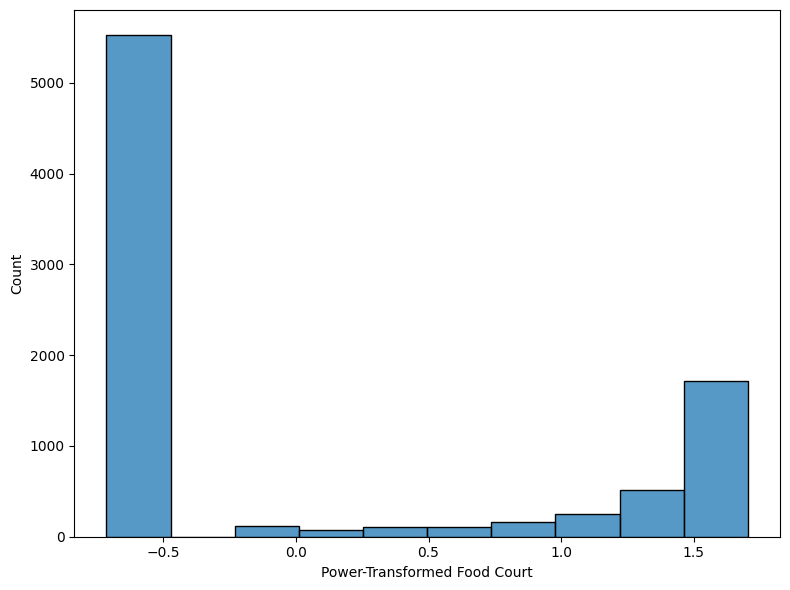

In [134]:
# Visualize distribution of new feature
fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()
sns.histplot(x=pt_food_court, bins=10, ax=ax)
ax.set_xlabel("Power-Transformed Food Court")
plt.show()

In [135]:
del pt_food_court

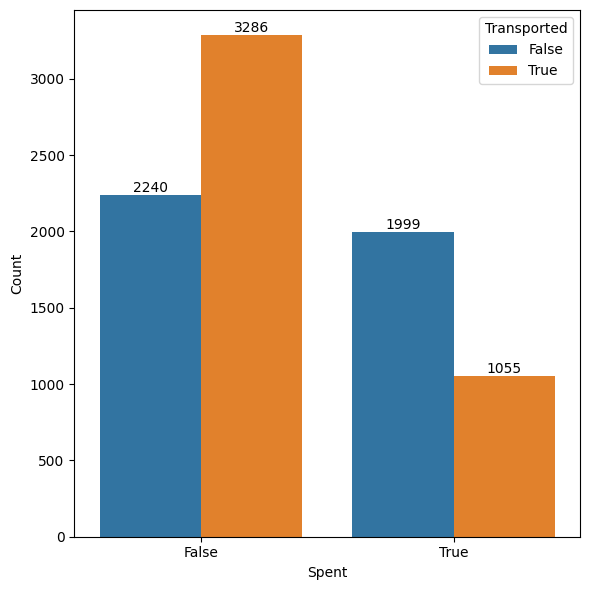

In [136]:
# Derive a binary feature from FoodCourt
tmp_df = (
    df_train.select(["FoodCourt", "Transported"])
    .drop_nulls()
    .with_columns(Spent=pl.col("FoodCourt").gt(0.0))
    .drop("FoodCourt")
)

fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(tmp_df, x="Spent", hue="Transported", ax=ax)
ax.set_ylabel("Count")

for container in ax.containers:
    ax.bar_label(container)  # pyright: ignore [reportArgumentType]

del tmp_df
plt.show()

## `ShoppingMall`

In [137]:
# Missing values BEFORE
df_train.get_column("ShoppingMall").is_null().sum()

208

In [138]:
# Fill some missing values based on CryoSleep
df_1 = (
    df_train.filter(pl.col("CryoSleep"), pl.col("ShoppingMall").is_null())
    .select("PassengerId")
    .with_columns(ShoppingMall=pl.lit(0.0))
)
df_train = (
    df_train.join(df_1, on="PassengerId", how="left")
    .with_columns(ShoppingMall=pl.col("ShoppingMall_right").fill_null(pl.col("ShoppingMall")))
    .drop("ShoppingMall_right")
)
del df_1
df_train.head(10)

PassengerId,Cabin,Destination,Age,VIP,RoomService,FoodCourt,…,HomePlanet,TotalSpent,CryoSleep,CabinDeck,CabinNum,CabinSide,CabinNumCount
str,str,str,f64,bool,f64,f64,…,str,f64,bool,str,i64,str,u32
"""0001_01""","""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,…,"""Europa""",0.0,false,"""B""",0,"""P""",18
"""0002_01""","""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,…,"""Earth""",736.0,false,"""F""",0,"""S""",18
"""0003_01""","""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,…,"""Europa""",10383.0,false,"""A""",0,"""S""",18
"""0003_02""","""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,…,"""Europa""",5176.0,false,"""A""",0,"""S""",18
"""0004_01""","""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,…,"""Earth""",1091.0,false,"""F""",1,"""S""",15
"""0005_01""","""F/0/P""","""PSO J318.5-22""",44.0,false,0.0,483.0,…,"""Earth""",774.0,false,"""F""",0,"""P""",18
"""0006_01""","""F/2/S""","""TRAPPIST-1e""",26.0,false,42.0,1539.0,…,"""Earth""",1584.0,false,"""F""",2,"""S""",11
"""0006_02""","""G/0/S""","""TRAPPIST-1e""",28.0,false,0.0,0.0,…,"""Earth""",0.0,true,"""G""",0,"""S""",18
"""0007_01""","""F/3/S""","""TRAPPIST-1e""",35.0,false,0.0,785.0,…,"""Earth""",1018.0,false,"""F""",3,"""S""",16


In [139]:
# Missing values AFTER
df_train.get_column("ShoppingMall").is_null().sum()

112

In [140]:
# Summary statistics
df_train.get_column("ShoppingMall").drop_nulls().describe()

statistic,value
str,f64
"""count""",8581.0
"""null_count""",0.0
"""mean""",171.785573
"""std""",601.581625
"""min""",0.0
"""25%""",0.0
"""50%""",0.0
"""75%""",24.0
"""max""",23492.0


In [141]:
# Power transformation of ShoppingMall
pt_shopping_mall = (
    PowerTransformer().fit_transform(df_train.select("ShoppingMall").drop_nulls().to_numpy()).flatten()
)

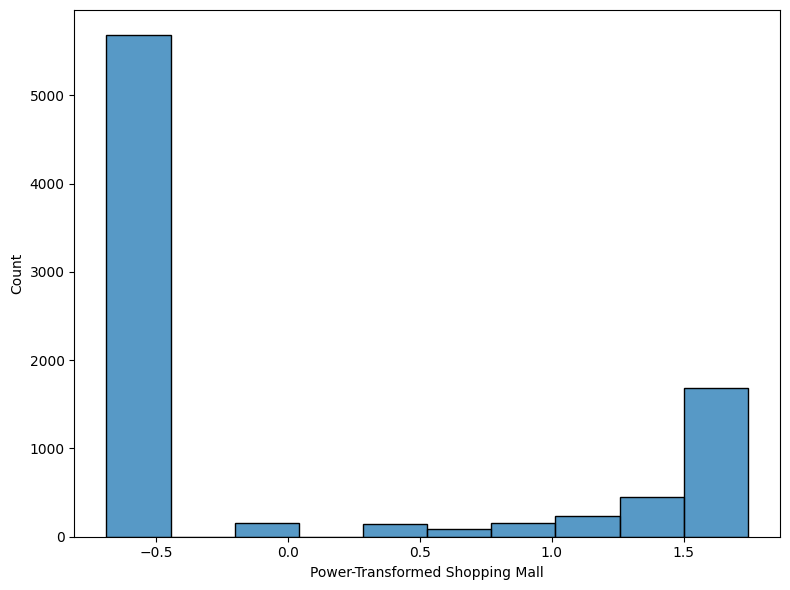

In [142]:
# Visualize distribution of new feature
fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()
sns.histplot(x=pt_shopping_mall, bins=10, ax=ax)
ax.set_xlabel("Power-Transformed Shopping Mall")
plt.show()

In [143]:
del pt_shopping_mall

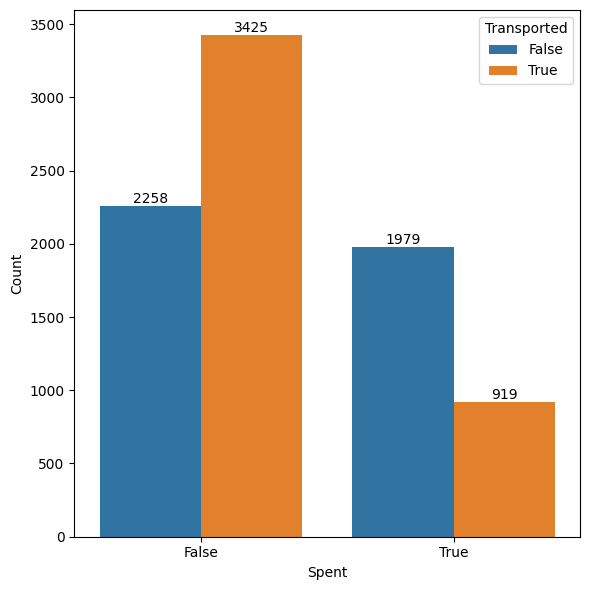

In [144]:
# Derive a binary feature from ShoppingMall
tmp_df = (
    df_train.select(["ShoppingMall", "Transported"])
    .drop_nulls()
    .with_columns(Spent=pl.col("ShoppingMall").gt(0.0))
    .drop("ShoppingMall")
)

fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(tmp_df, x="Spent", hue="Transported", ax=ax)
ax.set_ylabel("Count")

for container in ax.containers:
    ax.bar_label(container)  # pyright: ignore [reportArgumentType]

del tmp_df
plt.show()

## `Spa`

In [145]:
# Missing values BEFORE
df_train.get_column("Spa").is_null().sum()

183

In [146]:
# Fill some missing values based on CryoSleep
df_1 = (
    df_train.filter(pl.col("CryoSleep"), pl.col("Spa").is_null())
    .select("PassengerId")
    .with_columns(Spa=pl.lit(0.0))
)
df_train = (
    df_train.join(df_1, on="PassengerId", how="left")
    .with_columns(Spa=pl.col("Spa_right").fill_null(pl.col("Spa")))
    .drop("Spa_right")
)
del df_1
df_train.head(10)

PassengerId,Cabin,Destination,Age,VIP,RoomService,FoodCourt,…,HomePlanet,TotalSpent,CryoSleep,CabinDeck,CabinNum,CabinSide,CabinNumCount
str,str,str,f64,bool,f64,f64,…,str,f64,bool,str,i64,str,u32
"""0001_01""","""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,…,"""Europa""",0.0,false,"""B""",0,"""P""",18
"""0002_01""","""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,…,"""Earth""",736.0,false,"""F""",0,"""S""",18
"""0003_01""","""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,…,"""Europa""",10383.0,false,"""A""",0,"""S""",18
"""0003_02""","""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,…,"""Europa""",5176.0,false,"""A""",0,"""S""",18
"""0004_01""","""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,…,"""Earth""",1091.0,false,"""F""",1,"""S""",15
"""0005_01""","""F/0/P""","""PSO J318.5-22""",44.0,false,0.0,483.0,…,"""Earth""",774.0,false,"""F""",0,"""P""",18
"""0006_01""","""F/2/S""","""TRAPPIST-1e""",26.0,false,42.0,1539.0,…,"""Earth""",1584.0,false,"""F""",2,"""S""",11
"""0006_02""","""G/0/S""","""TRAPPIST-1e""",28.0,false,0.0,0.0,…,"""Earth""",0.0,true,"""G""",0,"""S""",18
"""0007_01""","""F/3/S""","""TRAPPIST-1e""",35.0,false,0.0,785.0,…,"""Earth""",1018.0,false,"""F""",3,"""S""",16


In [147]:
# Missing values AFTER
df_train.get_column("Spa").is_null().sum()

118

In [148]:
# Summary statistics
df_train.get_column("Spa").drop_nulls().describe()

statistic,value
str,f64
"""count""",8575.0
"""null_count""",0.0
"""mean""",308.780292
"""std""",1132.71017
"""min""",0.0
"""25%""",0.0
"""50%""",0.0
"""75%""",58.0
"""max""",22408.0


In [149]:
# Power transformation of Spa
pt_spa = PowerTransformer().fit_transform(df_train.select("Spa").drop_nulls().to_numpy()).flatten()

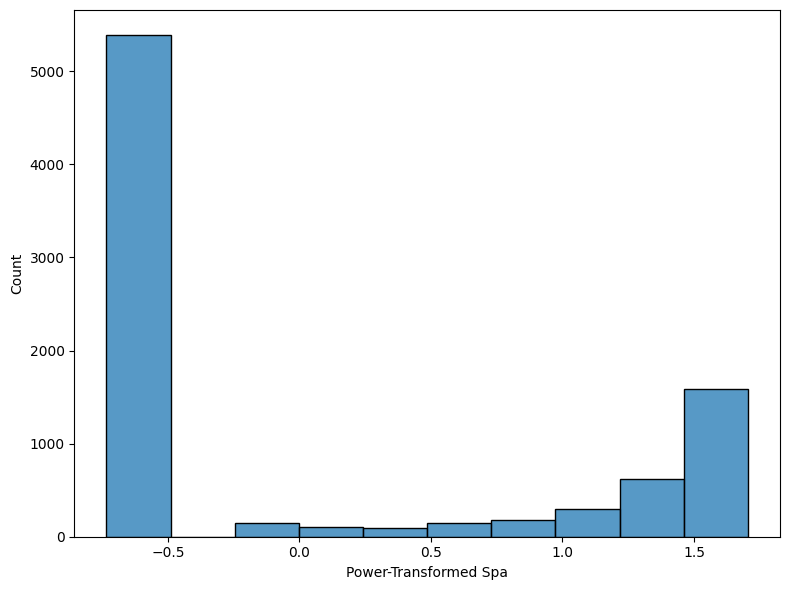

In [150]:
# Visualize distribution of new feature
fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()
sns.histplot(x=pt_spa, bins=10, ax=ax)
ax.set_xlabel("Power-Transformed Spa")
plt.show()

In [151]:
del pt_spa

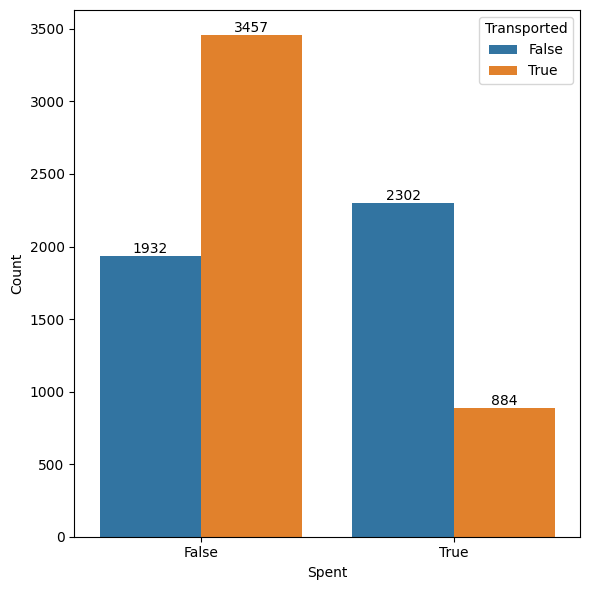

In [152]:
# Derive a binary feature from Spa
tmp_df = (
    df_train.select(["Spa", "Transported"]).drop_nulls().with_columns(Spent=pl.col("Spa").gt(0.0)).drop("Spa")
)

fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(tmp_df, x="Spent", hue="Transported", ax=ax)
ax.set_ylabel("Count")

for container in ax.containers:
    ax.bar_label(container)  # pyright: ignore [reportArgumentType]

del tmp_df
plt.show()

## `VRDeck`

In [153]:
# Missing values BEFORE
df_train.get_column("VRDeck").is_null().sum()

188

In [154]:
# Fill some missing values based on CryoSleep
df_1 = (
    df_train.filter(pl.col("CryoSleep"), pl.col("VRDeck").is_null())
    .select("PassengerId")
    .with_columns(VRDeck=pl.lit(0.0))
)
df_train = (
    df_train.join(df_1, on="PassengerId", how="left")
    .with_columns(VRDeck=pl.col("VRDeck_right").fill_null(pl.col("VRDeck")))
    .drop("VRDeck_right")
)
del df_1
df_train.head(10)

PassengerId,Cabin,Destination,Age,VIP,RoomService,FoodCourt,…,HomePlanet,TotalSpent,CryoSleep,CabinDeck,CabinNum,CabinSide,CabinNumCount
str,str,str,f64,bool,f64,f64,…,str,f64,bool,str,i64,str,u32
"""0001_01""","""B/0/P""","""TRAPPIST-1e""",39.0,false,0.0,0.0,…,"""Europa""",0.0,false,"""B""",0,"""P""",18
"""0002_01""","""F/0/S""","""TRAPPIST-1e""",24.0,false,109.0,9.0,…,"""Earth""",736.0,false,"""F""",0,"""S""",18
"""0003_01""","""A/0/S""","""TRAPPIST-1e""",58.0,true,43.0,3576.0,…,"""Europa""",10383.0,false,"""A""",0,"""S""",18
"""0003_02""","""A/0/S""","""TRAPPIST-1e""",33.0,false,0.0,1283.0,…,"""Europa""",5176.0,false,"""A""",0,"""S""",18
"""0004_01""","""F/1/S""","""TRAPPIST-1e""",16.0,false,303.0,70.0,…,"""Earth""",1091.0,false,"""F""",1,"""S""",15
"""0005_01""","""F/0/P""","""PSO J318.5-22""",44.0,false,0.0,483.0,…,"""Earth""",774.0,false,"""F""",0,"""P""",18
"""0006_01""","""F/2/S""","""TRAPPIST-1e""",26.0,false,42.0,1539.0,…,"""Earth""",1584.0,false,"""F""",2,"""S""",11
"""0006_02""","""G/0/S""","""TRAPPIST-1e""",28.0,false,0.0,0.0,…,"""Earth""",0.0,true,"""G""",0,"""S""",18
"""0007_01""","""F/3/S""","""TRAPPIST-1e""",35.0,false,0.0,785.0,…,"""Earth""",1018.0,false,"""F""",3,"""S""",16


In [155]:
# Missing values AFTER
df_train.get_column("VRDeck").is_null().sum()

126

In [156]:
# Quick check
assert (
    df_train.filter(pl.col("CryoSleep"))
    .select(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "TotalSpent"])
    .to_pandas()
    .eq(0.0)
    .all()
    .all()  # pyright: ignore [reportAttributeAccessIssue]
)

In [157]:
# Summary statistics
df_train.get_column("VRDeck").drop_nulls().describe()

statistic,value
str,f64
"""count""",8567.0
"""null_count""",0.0
"""mean""",302.648535
"""std""",1141.855811
"""min""",0.0
"""25%""",0.0
"""50%""",0.0
"""75%""",44.0
"""max""",24133.0


In [158]:
# Power transformation of VRDeck
pt_vr_deck = PowerTransformer().fit_transform(df_train.select("VRDeck").drop_nulls().to_numpy()).flatten()

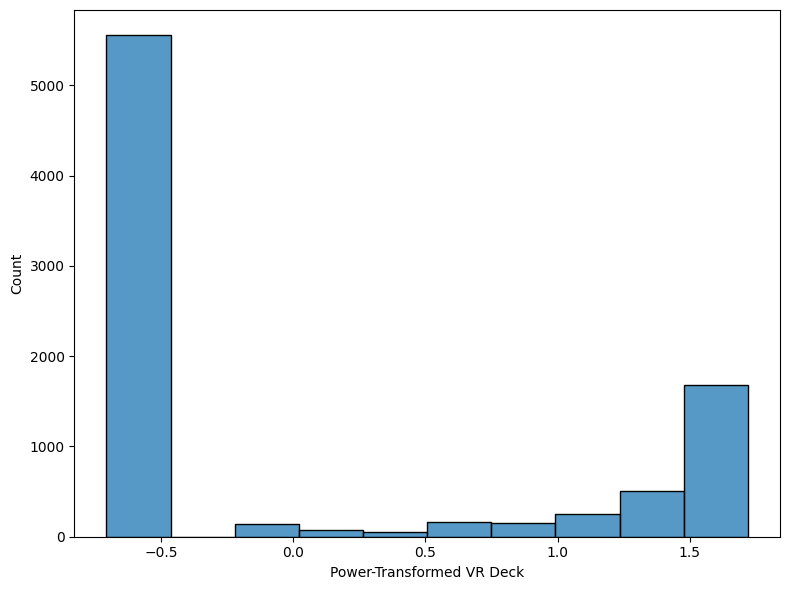

In [159]:
# Visualize distribution of new feature
fig = plt.figure(figsize=(8.0, 6.0), layout="tight")
ax = fig.add_subplot()
sns.histplot(x=pt_vr_deck, bins=10, ax=ax)
ax.set_xlabel("Power-Transformed VR Deck")
plt.show()

In [160]:
del pt_vr_deck

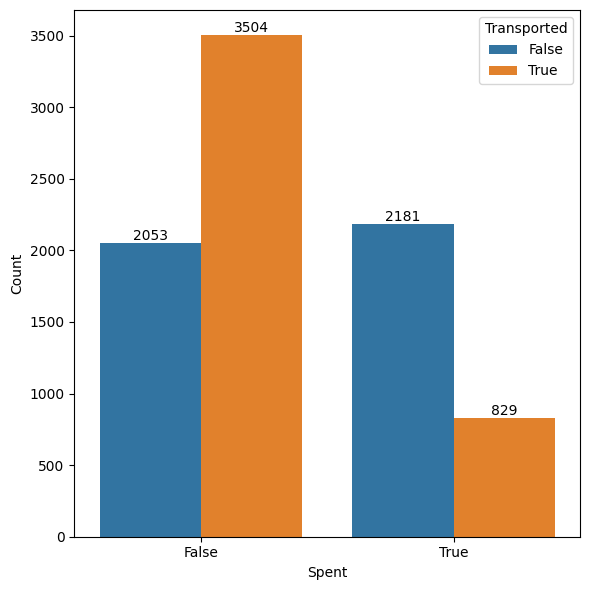

In [161]:
# Derive a binary feature from VRDeck
tmp_df = (
    df_train.select(["VRDeck", "Transported"])
    .drop_nulls()
    .with_columns(Spent=pl.col("VRDeck").gt(0.0))
    .drop("VRDeck")
)

fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()

sns.countplot(tmp_df, x="Spent", hue="Transported", ax=ax)
ax.set_ylabel("Count")

for container in ax.containers:
    ax.bar_label(container)  # pyright: ignore [reportArgumentType]

del tmp_df
plt.show()

## All numeric variables

In [162]:
# Correlation
df_numeric = df_train.select(cs.numeric().exclude("CabinNum")).drop_nulls()
corr = df_numeric.corr()
corr

Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CompanionCount,TotalSpent,CabinNumCount
f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,0.068355,0.129183,0.0336,0.122422,0.102386,-0.179756,0.186589,0.079218
0.068355,1.0,-0.013979,0.058894,0.019348,-0.015864,-0.045008,0.233764,-0.001048
0.129183,-0.013979,1.0,-0.009398,0.220442,0.222333,0.030406,0.749484,0.198328
0.0336,0.058894,-0.009398,1.0,0.019624,-0.001059,-0.037402,0.231675,-0.014315
0.122422,0.019348,0.220442,0.019624,1.0,0.150173,0.016309,0.59401,0.136252
0.102386,-0.015864,0.222333,-0.001059,0.150173,1.0,0.009248,0.575949,0.12479
-0.179756,-0.045008,0.030406,-0.037402,0.016309,0.009248,1.0,0.009416,0.293814
0.186589,0.233764,0.749484,0.231675,0.59401,0.575949,0.009416,1.0,0.214797
0.079218,-0.001048,0.198328,-0.014315,0.136252,0.12479,0.293814,0.214797,1.0


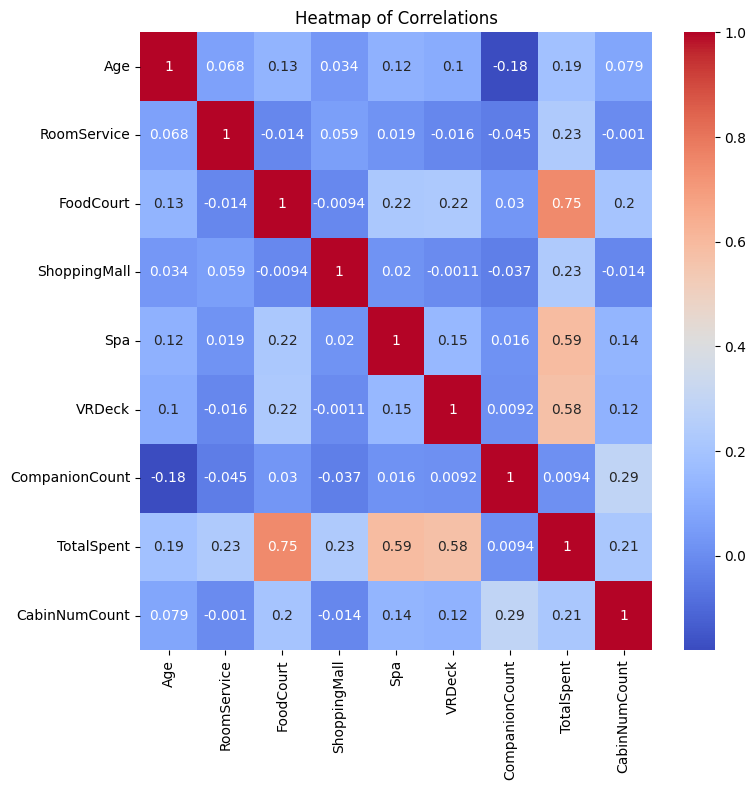

In [163]:
# Create heatmap
fig = plt.figure(figsize=(8.0, 8.0), layout="tight")
ax = fig.add_subplot()

sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    annot=True,
    cmap=mpl.colormaps["coolwarm"],
    ax=ax,
)
ax.set_title("Heatmap of Correlations")

del corr
plt.show()

In [164]:
del df_numeric

## `Name`

In [165]:
names = df_train.get_column("Name").drop_nulls()
names.head()

Name
str
"""Maham Ofraccul…"
"""Juanna Vines"""
"""Altark Susent"""
"""Solam Susent"""
"""Willy Santanti…"
"""Sandie Hinetth…"
"""Billex Jacosta…"
"""Candra Jacosta…"
"""Andona Beston"""


In [166]:
# Every name has 2 parts: the first name and 1 surname
assert names.str.split(" ").list.len().eq(2).all()

In [167]:
# Number of unique surnames
names.str.split(" ").list.last().n_unique()

2217

In [168]:
# Add Surname column to DataFrame
df_surnames = (
    df_train.filter(pl.col("Name").is_not_null())
    .select(["PassengerId", "Name"])
    .with_columns(pl.col("Name").str.split(" ").list.last().alias("Surname"))
    .drop("Name")
)
df_train = df_train.join(df_surnames, on="PassengerId", how="left")
del df_surnames
df_train.select(["PassengerId", "Name", "Surname"]).head(10)

PassengerId,Name,Surname
str,str,str
"""0001_01""","""Maham Ofraccul…","""Ofracculy"""
"""0002_01""","""Juanna Vines""","""Vines"""
"""0003_01""","""Altark Susent""","""Susent"""
"""0003_02""","""Solam Susent""","""Susent"""
"""0004_01""","""Willy Santanti…","""Santantines"""
"""0005_01""","""Sandie Hinetth…","""Hinetthews"""
"""0006_01""","""Billex Jacosta…","""Jacostaffey"""
"""0006_02""","""Candra Jacosta…","""Jacostaffey"""
"""0007_01""","""Andona Beston""","""Beston"""


In [169]:
# Most of the time, passengers who belong to the same group are also part of
# the same family
df_train.select(["Group", "Surname"]).drop_nulls().group_by("Group").agg(
    pl.col("Surname").n_unique().alias("UniqueSurnames")
).with_columns(pl.col("UniqueSurnames").eq(1).alias("OnlyOneSurname")).get_column(
    "OnlyOneSurname"
).value_counts(sort=True)

OnlyOneSurname,count
bool,u32
true,5864
false,249


In [170]:
# Count encoding for Surname
surname_counts = df_train.get_column("Surname").drop_nulls().value_counts().rename({"count": "SurnameCount"})
df_train = df_train.join(surname_counts, on="Surname", how="left")
del surname_counts
# df_train.head(20)

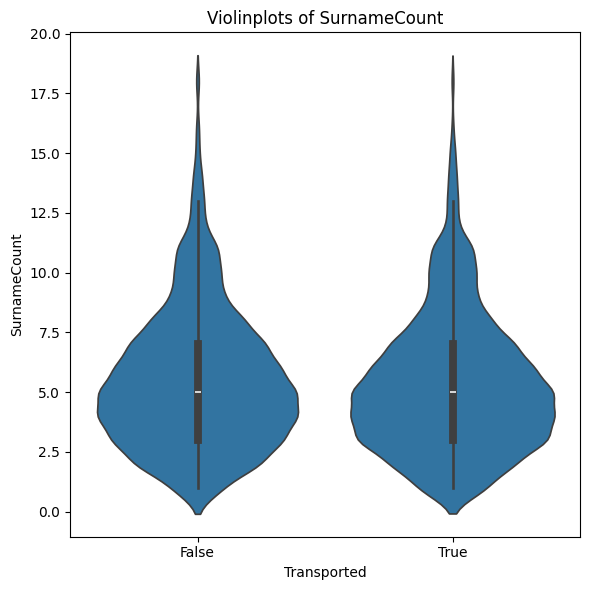

In [171]:
# Visualize count encoding
fig = plt.figure(figsize=(6.0, 6.0), layout="tight")
ax = fig.add_subplot()
sns.violinplot(
    df_train.select(["SurnameCount", "Transported"]).drop_nulls(),
    x="Transported",
    y="SurnameCount",
    ax=ax,
)
ax.set_title("Violinplots of SurnameCount")
plt.show()

In [172]:
# Passengers with the same surname are from the same planet
df_train.select(["Surname", "HomePlanet"]).drop_nulls().group_by("Surname").agg(
    pl.col("HomePlanet").n_unique().alias("UniqueHomePlanets")
).get_column("UniqueHomePlanets").eq(1).all()

True